# 01_EDA
The purpose of this notebook is to conduct a comprehensive exploratory data analysis (EDA) on the provided dataset. Initially, we focus on general analysis aspects such as checking for null values, assessing data types, examining the nature of the data, identifying unique values etc. Additionally, we present visual samples of the data for a more author-friendly visualization. Subsequently, we draw conclusions based on our general analysis.

Later in the notebook, we delve into EDA on a feature-wise basis. Seperate attention is given to handling different data types like string, boolean etc. columns in a distinct manner. During the general analysis phase, we discovered JSON-like objects that store textual data inside an array. As a result, we make efforts to extract information from these JSON-like objects and plot word clouds and word frequency plots, providing insights into the top words contained within the textual data.

The overall goal is to enhance understanding and uncover meaningful insights from the dataset through a thorough and systematic exploratory data analysis

## 0. Reading data

In [1]:
# Importing libraries:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from wordcloud import WordCloud
from collections import Counter

In [2]:
# Setting up the project directory
os.chdir(Path(os.path.realpath("")).resolve().parents[1])

In [10]:
# Importing modules that fetch raw data
from src.getter.load_application_and_opportunity import get_raw_data
from src.getter.save_application_and_opportunity import save_plot

# Getting and reading a few lines of data
rdata = get_raw_data()
rdata.head()

OpportunityId             ApplicationId  \
0  MbzeABKVn06G8irkoHJeIg==  nTzdqGj020CYqTouPocGSg==   
1  7SPt0A57/kyzM9hE9vxDRg==  QVk5MFCZ70WvlZE9FzAW9g==   
2  7SPt0A57/kyzM9hE9vxDRg==  I1kcPlAw3E+rqceh0qrutQ==   
3  zolSWBFjWESbfkj8AXLYwA==  VTCXZK6/ZUWJDpxTcm2CRg==   
4  zolSWBFjWESbfkj8AXLYwA==  I6KgcL0jdkG8wBnL1+BZ/g==   

                            ExternalBriefDescription  \
0  $16.00 Per Hour\n\nAt Orkin, our purpose is to...   
1  $15.00 Per Hour\n\nAt Orkin, our purpose is to...   
2  $15.00 Per Hour\n\nAt Orkin, our purpose is to...   
3  $15.00 Per Hour\n\nAt Orkin, our purpose is to...   
4  $15.00 Per Hour\n\nAt Orkin, our purpose is to...   

                                 ExternalDescription  \
0  <p><strong>$16.00 Per Hour</strong></p>\n<p><s...   
1  <p><strong>$15.00 Per Hour</strong></p>\n<p><s...   
2  <p><strong>$15.00 Per Hour</strong></p>\n<p><s...   
3  <p><strong>$15.00 Per Hour</strong></p>\n<p><s...   
4  <p><strong>$15.00 Per Hour</strong></p>\n<p><s...   

                         Title   JobCategoryName  IsRejected  \
0  Customer Service Specialist  Customer Service        True   
1  Customer Service Specialist  Customer Service        True   
2  Customer Service Specialist  Customer Service        True   
3  Customer Service Specialist  Customer Service        True   
4  Customer Service Specialist  Customer Service        True   

   IsCandidateInternal                                   BehaviorCriteria  \
0                False  [{'Description': 'Capable of carrying out a gi...   
1                False  [{'Description': 'Capable of carrying out a gi...   
2                False  [{'Description': 'Capable of carrying out a gi...   
3                False  [{'Description': 'Capable of carrying out a gi...   
4                False  [{'Description': 'Capable of carrying out a gi...   

                                  MotivationCriteria  ...  \
0  [{'Description': 'Inspired to perform well by ...  ...   
1  [{'Description': 'Inspired to perform well by ...  ...   
2  [{'Description': 'Inspired to perform well by ...  ...   
3  [{'Description': 'Inspired to perform well by ...  ...   
4  [{'Description': 'Inspired to perform well by ...  ...   

                                          Educations LicenseAndCertifications  \
0  [{'Degree': 'Some college', 'Description': Non...                       []   
1  [{'Degree': 'Diploma', 'Description': None, 'G...                       []   
2  [{'Degree': 'HIGH SCHOOL DIPLOMA', 'Descriptio...                       []   
3  [{'Degree': 'Associate in Early', 'Description...                       []   
4  [{'Degree': 'Bachelor of Business Admin', 'Des...                       []   

                                              Skills  \
0  [{'ScaleValue': '4', 'ScaleValueName': 'Advanc...   
1  [{'ScaleValue': '5', 'ScaleValueName': 'Expert...   
2  [{'ScaleValue': '4', 'ScaleValueName': 'Advanc...   
3  [{'ScaleValue': '5', 'ScaleValueName': 'Expert...   
4  [{'ScaleValue': '5', 'ScaleValueName': 'Expert...   

                                         Motivations  \
0  [{'Description': 'Inspired to perform well by ...   
1                                                 []   
2                                                 []   
3                                                 []   
4                                                 []   

                                           Behaviors  \
0  [{'Description': 'Devoted to a task or purpose...   
1                                                 []   
2                                                 []   
3                                                 []   
4                                                 []   

                     StepId StepName  Tag StepGroup pass_first_step  
0  K8yQlic+/UiXxBMpOnAoLQ==  Decline  2.0  declined           False  
1  K8yQlic+/UiXxBMpOnAoLQ==  Decline  2.0  declined           False  
2  K8yQlic+/UiXxBMpOnAoLQ==  Decline  2.0  declined           False  
3  K

# 1. Data Analysis

## 1.1 General Analysis

In [20]:
# Printing the shape and size of the data

print("Shape =", rdata.shape, "\nTotal number of data points =", rdata.size)

# Information on the rdata to check: NaN, column names, dtype counts etc

print(rdata.info())

Shape = (110267, 24) 
Total number of data points = 2646408
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110267 entries, 0 to 110266
Data columns (total 24 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   OpportunityId                    110267 non-null  object 
 1   ApplicationId                    110267 non-null  object 
 2   ExternalBriefDescription         110267 non-null  object 
 3   ExternalDescription              110267 non-null  object 
 4   Title                            110267 non-null  object 
 5   JobCategoryName                  110267 non-null  object 
 6   IsRejected                       110267 non-null  bool   
 7   IsCandidateInternal              110267 non-null  bool   
 8   BehaviorCriteria                 110267 non-null  object 
 9   MotivationCriteria               110267 non-null  object 
 10  EducationCriteria                110267 non-null  object 
 11  Licen

In [21]:
# Checking null values in each of the column

rdata.isnull().any()

OpportunityId                      False
ApplicationId                      False
ExternalBriefDescription           False
ExternalDescription                False
Title                              False
JobCategoryName                    False
IsRejected                         False
IsCandidateInternal                False
BehaviorCriteria                   False
MotivationCriteria                 False
EducationCriteria                  False
LicenseAndCertificationCriteria    False
SkillCriteria                      False
WorkExperiences                    False
Educations                         False
LicenseAndCertifications           False
Skills                             False
Motivations                        False
Behaviors                          False
StepId                             False
StepName                           False
Tag                                 True
StepGroup                          False
pass_first_step                    False
dtype: bool

In [22]:
# Examining null values in column = 'Tag'

rdata.Tag.isnull().sum()

10873

In [23]:
# Checking for datatypes in each row, column wise

for columns in rdata.columns:
    print(
        columns, " : ", type(rdata[columns][np.random.randint(rdata.shape[0])])
    )

OpportunityId  :  <class 'str'>
ApplicationId  :  <class 'str'>
ExternalBriefDescription  :  <class 'str'>
ExternalDescription  :  <class 'str'>
Title  :  <class 'str'>
JobCategoryName  :  <class 'str'>
IsRejected  :  <class 'numpy.bool_'>
IsCandidateInternal  :  <class 'numpy.bool_'>
BehaviorCriteria  :  <class 'numpy.ndarray'>
MotivationCriteria  :  <class 'numpy.ndarray'>
EducationCriteria  :  <class 'numpy.ndarray'>
LicenseAndCertificationCriteria  :  <class 'numpy.ndarray'>
SkillCriteria  :  <class 'numpy.ndarray'>
WorkExperiences  :  <class 'numpy.ndarray'>
Educations  :  <class 'numpy.ndarray'>
LicenseAndCertifications  :  <class 'numpy.ndarray'>
Skills  :  <class 'numpy.ndarray'>
Motivations  :  <class 'numpy.ndarray'>
Behaviors  :  <class 'numpy.ndarray'>
StepId  :  <class 'str'>
StepName  :  <class 'str'>
Tag  :  <class 'numpy.float64'>
StepGroup  :  <class 'str'>
pass_first_step  :  <class 'numpy.bool_'>


In [24]:
# Examining unique values in each column

rdata.select_dtypes(exclude=np.ndarray).nunique()

IsRejected             2
IsCandidateInternal    2
Tag                    7
pass_first_step        2
dtype: int64

In [25]:
# Printing 3 random values columnwise for general viewing and understanding

random_row_number = np.random.randint(0, rdata.shape[0], size=3)

for columns in rdata.columns:
    print(columns + "=" * 50)

    for random_number in random_row_number:
        print(
            "row: {} & column: ".format(random_number)
            + columns
            + ": "
            + str(rdata[columns][random_number])
        )
        print("+" * 10)

    print("_" * 25)

OpportunityId==================================================
row: 100327 & column: OpportunityId: l/cg0o6twUeaZa/AfYAFPQ==
++++++++++
row: 99671 & column: OpportunityId: HhUW9qJSoUelxVOPUWh65w==
++++++++++
row: 48225 & column: OpportunityId: L3ejgWlDMkSzkRtj4mdQ4g==
++++++++++
_________________________
ApplicationId==================================================
row: 100327 & column: ApplicationId: KUDEhmR+EU6GK9nXZm7eJg==
++++++++++
row: 99671 & column: ApplicationId: dfpU4RMDbUS0UOg4cduntA==
++++++++++
row: 48225 & column: ApplicationId: JfpJBVdfjU2K89g0kIb4GQ==
++++++++++
_________________________
ExternalBriefDescription==================================================
row: 100327 & column: ExternalBriefDescription: As one of our Leasing Consultants your day is all about PEOPLE!!  Being enthusiastic and creative while knowing what drives the market makes you a top-notch sales person!  Your people-loving soul, who is a home finding helper, makes you a hero!

We offer 3 weeks 

### Conclusions from the data analysis and general observation:


1. OpportunityID: This is a unique identifier for each job opportunityand is 
represented in the data as a string.

2. ApplicationID: It is a string that represents the unique values of 
candidates' application IDs. Each row is uniquely identified by the 
ApplicaitionID.

3. Column ExternalBriefDescription: This column contains text with no HTML tags
 and is represented as a string.
 
4. Column ExternalDescription: This column contains HTML tags and therefore 
needs to have the HTML tags removed during preprocessing. The texts in this 
column are usually longer than those in ExternalBriefDescription.
5. Title and JobCategoryName: These columns are text and are represented as 
strings in a specific format.
6. IsRejected and IsCandidateInternal: These columns contain boolean 
information.
7. Columns: BehaviorCriteria, MotivationCriteria, EducationCriteria, 
LicenseAndCertificationCriteria, SkillCriteria, WorkExperiences, Educations, 
LicenseAndCertifications, Skills, Motivations, and Behaviors: All of these 
columns contain array information that includes specific dictionaries. Each 
dictionary 8. needs to be extracted for its keys and values and then analyzed.
8. StepID and StepName: These columns contain text.
9. Tags: These may appear at some points in the data.
10. Pass_first_step is a Boolean column, and StepGroup is a multichoice option.

## 1.2 Feature wise EDA

### 1.2.1 Univariate Analysis - Text and Boolean columns

In [26]:
# Gathering unique count and nonzero values for each string features:

for x in [
    "OpportunityId",
    "ApplicationId",
    "ExternalBriefDescription",
    "ExternalDescription",
    "Title",
    "JobCategoryName",
    "IsRejected",
    "IsCandidateInternal",
    "StepId",
    "StepName",
    "Tag",
    "StepGroup",
    "pass_first_step",
]:
    # Printing unique values
    print(x + " - Unique Values  = " + str(rdata[x].unique().size))

    # Printing null values
    print(x + " - Null values = " + str((rdata[x].isna().sum())))
    print("*" * 50 + "\n")

OpportunityId - Unique Values  = 8473
OpportunityId - Null values = 0
**************************************************

ApplicationId - Unique Values  = 110267
ApplicationId - Null values = 0
**************************************************

ExternalBriefDescription - Unique Values  = 1547
ExternalBriefDescription - Null values = 0
**************************************************

ExternalDescription - Unique Values  = 2761
ExternalDescription - Null values = 0
**************************************************

Title - Unique Values  = 2072
Title - Null values = 0
**************************************************

JobCategoryName - Unique Values  = 128
JobCategoryName - Null values = 0
**************************************************

IsRejected - Unique Values  = 2
IsRejected - Null values = 0
**************************************************

IsCandidateInternal - Unique Values  = 2
IsCandidateInternal - Null values = 0
**************************************************

S

In [27]:
# Assessing the 7 values in the column StepGroup

set(rdata.StepGroup.values.tolist())

{'background_check',
 'declined',
 'hired',
 'interview',
 'other',
 'references',
 'screen'}

#### Observations: Univariate Analysis: Text and Boolean columns
1. Application ID values is the most unique feature and can be considered as unique id. 
2. A total of 8473 unique jobs have been posted, obtained through Opportunity ID: 
3. StepGroup is a non-null column with 7 unique values. 

### 2.2.2 Univariate Analysis - Columns with JSON arrays like objects 

All the data columns contain JSON objects however each of the JSON object is not wrapped in a string <u><b> making it look like JSON array like objects </b></u> . For example, in row: 82874 & column: Skills: [{'ScaleValue': '1', 'ScaleValueName': 'Novice', 'Skill': 'Apqp'}], the array contains a dictionary instead of a string. Hence, we definea few functions to extract the data based on the following observations. 

The column properties are described below:  

1. BehaviorCriteria:
There are few textual rows in this category, each representing a different set of behavior criteria. Each set of criteria is a list of behaviors that describe specific qualities or attributes required for a job role. For example, in row 7411, the behavior criteria include "Detail Oriented" and "Dedicated," both marked as "Required" with their descriptions.
These criteria help assess the suitability of a candidate for a job based on their behavior and thus contains valuable information in finding the similarity with the candidate. 

2. MotivationCriteria:
There are a few rows of textual data in this category, each representing a different set of motivation criteria. Each set of criteria is a list of factors that motivate a person at work, such as "Financial," "Job Security," and "Goal Completion." Each criterion is marked as "Required" or "false" to indicate whether it's a mandatory requirement for the job.

3. EducationCriteria:
The rows in this category, represent different education criteria for job applicants.
These criteria specify the required education levels or degrees for the job, such as "Bachelors," "Certification," or "High School/GED."
"Required" indicates whether the specified education level is mandatory for the job.

4. LicenseAndCertificationCriteria:
The rows reprsent different sets of license and certification criteria.
These criteria list specific licenses or certifications required for the job, such as "Driver License," "EPA Cert/HVAC," or "Emily Jones."
Each criterion is marked as "Required" or "false" to indicate whether it's mandatory for the job.

5. SkillCriteria:
There are varying rows in this category, each representing a different set of skill criteria.
These criteria specify the skills required for the job, such as "Driving," "Follow Specifications," and "Problem Solving Ability."
"Required" indicates whether a particular skill is mandatory for the job.

6. WorkExperiences:
These represent a person's past work experiences.
Each set includes details about the job titles, organizations, start and end dates, and a description of the tasks performed in each role.

7. Educations:
Contains rows of education data, each representing an individual's educational background.
Details include the type of degree, major, school, start and graduation dates, and other relevant information.

8. LicenseAndCertifications:
There are sets of license and certification data.
Each set provides information about the status, awarded date, license or certification name, and license number.

9. Skills:
There are three sets of skills data, each listing the skills of an individual along with a rating of expertise.
Skills are rated on a scale from "Some Knowledge" to "Expert," and the data includes skills like "Training," "Budgets," and "Excellent communication skills."

*Overall,* 
1. *Each of the array data columns contains arrays with a varied number of shapes.*
2. *The objects themselves are dictionaries with key-value pairs containing specific keys and corresponding answers stored as values (someof which) containing copious amounts of text.*
3. *Therefore the value pairs require data preprocessing and will be assessed in the subsequent sections to measure word frequency and perform other text-related analyses.*
4. Each of the rows contains valuable information linking to either opportunity or candidate, so it is prudent to treat these in a specialised manner. 


**In this section, we will assess the shapes of the arrays.**

### 1.2.2.1 Defining functions that extract the information from JSON like objects from each row and column and applying these functions

In [28]:
# Defining a few functions to gather information from the JSON objects


def get_keylist(column_value):
    """
    Function returns unique key values for each of the array containing JSON
    like objects

    Args:

    column_value : pandas.DataFrame
        Data containing the columns containing JSON like object

    Returns:

    set(k) : set object
        Set of key values contained by the JSON like objects
    """

    keylist = []

    for arrys in column_value:
        for items in arrys:
            for keys, values in items.items():
                keylist.append(keys)

    return set(keylist)


def data_extractor(data, column_name, key_list):
    """
    Extracts data from the JSON array like objects in the columns and creates 
    the additional with the name column_keyname and then places the list of 
    values assumed by the JSON like objects in the column.

    Args:

    data : pandas.DataFrame
        Dataset containing the JSON array like objects columnname (str): Target
         column with JSON array like objects in each row on which the operation 
         needs to be performedkeylist (str): key list  obtained by running 
         get_keylist(colvalue)

    Returns:

    data : pandas.DataFrame
        Column with the name format 'colum_name'_'keylist' with list of all
        values in the JSON array like objects
    """

    def json_like_obj_extractor(json_like_obj):
        return [x.get(key_list) for x in json_like_obj]

    # Adding '__' for unique identification of data extracted columns
    data[column_name + "__" + key_list] = data[column_name].apply(
        json_like_obj_extractor
    )

    return

In [29]:
# Generating necessary functions for preprocessing the data


def preprocessing(ls, stemming=False):
    """
    Preprocesses the list of texts by doing the following:
    1. Removes HTML tags
    2. Converts text to lower case
    3. Decontracts words for example : "won't" becomes "will not" etc
    4. Tokenizes the words
    5. Removes stop words
    6. Applies Porters stemmer if stemming = True

    Args:
    ls (list): Input text for preprocessing
    stemming (bool): Flag to enable stemming (default is False)
    input_islist (bool): Flag to enable preprocessing of text inside list.
    If False, the input is treated as string

    Returns:
    text (str): Preprocessed text for further use
    """
    # Taking care of values other than string that may come across
    ls = map(str, ls)

    # Converting contents of string into text
    text = " ".join(ls)

    # converting the text into str if any
    text = str(text)

    # removing html_text
    text = re.sub(r"<.*?>", "", text)

    # Lowering the case of the tokens
    text = text.lower()

    # Adding a few more functions for text processing

    # Code obtained from # https://stackoverflow.com/a/47091490/4084039
    # Removing decontracted words from
    def decontracted(phrase):
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general contractions
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        return phrase

    # Replacing decontracted words
    text = decontracted(text)

    # Removing special characters
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)

    # Removing stopwords
    tkns = word_tokenize(text)
    stpwrds = set(stopwords.words("english"))
    tkns = [e for e in tkns if e not in stpwrds]

    # Applying Stemmer
    # Not recommended for BERT based models etc
    # Applicable only to word2vec

    if stemming:
        stemmer = PorterStemmer()
        tkns = "".join([stemmer.stem(words) for words in tkns])

    n_text = " ".join(tkns)
    return n_text

#### 1.2.2.2 Applying the functions to JSON like objects

In [30]:
# Gathering a list of columns with JSON like objects

arraycol = [
    "BehaviorCriteria",
    "MotivationCriteria",
    "EducationCriteria",
    "LicenseAndCertificationCriteria",
    "SkillCriteria",
    "WorkExperiences",
    "Educations",
    "LicenseAndCertifications",
    "Skills",
    "Motivations",
    "Behaviors",
]


# Running the newly defined functions to extract data from each of the columns
# We do this by
# gathering the keylists by implementing get_keylist function and then
# iteratively, run the data_extractor so as to get the necessary columns with list data

for colnames in arraycol:
    keylist = get_keylist(rdata[colnames])

    for keynames in keylist:
        data_extractor(rdata, colnames, keynames)

In [31]:
(rdata["Behaviors"][0])

array([{'Description': 'Devoted to a task or purpose with loyalty or integrity', 'Name': 'Dedicated'},
       {'Description': 'Capable of carrying out a given task with all details necessary to get the task done well', 'Name': 'Detail Oriented'},
       {'Description': 'Consistently introduces new ideas and demonstrates original thinking', 'Name': 'Innovative'},
       {'Description': 'Shows firm and constant support to a cause', 'Name': 'Loyal'},
       {'Description': 'Works well as a member of a group', 'Name': 'Team Player'},
       {'Description': 'Shows intense and eager enjoyment and interest', 'Name': 'Enthusiastic'},
       {'Description': 'Inspires teammates to follow them', 'Name': 'Leader'}],
      dtype=object)

In [32]:
# Gathering list of columns with extracted data (obtained from data_extractor)

json_columns = [x for x in rdata.columns if re.match(r".*__.*", x)]

# Applying preprocessing(pp) steps and generating new columns
# Applying word preprocessing steps

pp_colnames = []

for colnames in json_columns:
    rdata[colnames + "_pp"] = rdata[colnames].apply(preprocessing)
    pp_colnames.append(colnames + "_pp")

/var/folders/_0/gwtrw0ms65zdzng2095bbrdr0000gn/T/ipykernel_99754/3611428912.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rdata[colnames + "_pp"] = rdata[colnames].apply(preprocessing)
/var/folders/_0/gwtrw0ms65zdzng2095bbrdr0000gn/T/ipykernel_99754/3611428912.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rdata[colnames + "_pp"] = rdata[colnames].apply(preprocessing)


#### 1.2.2.3 Creating WordCloud and WordFreqPlots Functions

In [39]:
# Defining functions to conduct EDA for text data
# Plotting wordcloud, code obtained from: OpenAI. (2023) ChatGPT 3.5 [Large language model] and modified


def wordcloud(data, column_name):
    """
    Function intakes, data and its column name to return standard word cloud

    Args:
    data : (pandas.DataFrame)
      Entire dataset containing columns whose wordcloud needs to be created 
      column_name (str): string - column name to use for printing word cloud

    Returns: None
      This function intakes the data and its column name to extract relevant 
      column and then tokenizes it into word, and creates the wordcloud plot 
      to visualize the common words. The bigger the size of the word, more 
      frequently it appears in the dataset

    """

    # Joining all texts in each row into a single large doc
    text = " ".join(data[column_name])

    # Taking care of columns with no words
    if len(text) > 0:
        wrdcld = WordCloud(
            width=600,
            height=300,
            background_color="white",
            include_numbers=True,
        ).generate(text)

        # Plotting the wordcloud
        plt.figure(figsize=(5, 3))
        plt.imshow(wrdcld, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Word cloud: {column_name}".replace("_pp", ""))
        save_plot(filename=f'word_cloud_{column_name}'.replace("_pp", ""), foldername='eda')
        plt.show()


# Plotting barchart vs frequency of words that appear


def wordfreqplot(data, column_name):
    """
      Generate a word frequency plot from text data in a specified column of a
    DataFrame.

    Args:
    data : pandas.DataFrame
      The DataFrame containing the text data.
    column_name : str
      The names of the column in the DataFrame containing the text.

    Returns: None
      This function takes a pandas DataFrame and a column name as input, 
      extracts the text data from the specified column, tokenizes it into 
      words, and creates a word frequency plot and top 10 frequent words 
      (along with the frequency) to visualize the most common words in text.
    """
  

    # Joining all texts in each row into a single large doc
    text = " ".join(data[column_name])

    if len(text) > 0:
        words = word_tokenize(text)
        word_freq = Counter(words)

        # Convert the word frequency dictionary into a DataFrame for easier plotting
        word_freq_df = pd.DataFrame.from_dict(
            word_freq, orient="index", columns=["Frequency"]
        )

        word_freq_df.index.name = "Word"

        # Sort the DataFrame by frequency
        word_freq_df.sort_values(by="Frequency", ascending=False, inplace=True)

        # Plot a bar chart
        plt.figure(figsize=(2.5, 1.5))
        word_freq_df.plot(kind="bar")
        plt.xlabel("Words")
        plt.ylabel("Frequency")
        plt.title(f"Word frequencies: {column_name}".replace("_pp", ""))
        save_plot(filename=f'word_frequency_{column_name}'.replace("_pp", ""), foldername='eda')
        plt.show()

        print(
            "\n\n\n",
            print(
                word_freq_df.sort_values(by="Frequency", ascending=False).head(
                    10
                )
            ),
        )

#### 1.2.2.4 Applying wordclouds and frequency plots

For each column, we will generate both a word frequency plot, illustrating the most frequent words by size, and a word frequency graph, indicating the occurrences of specific words. Additionally, we will provide frequency counts for the top ten most occurring words.

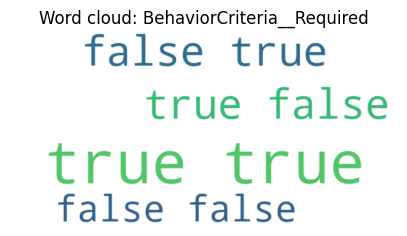

WordCloud for the column: BehaviorCriteria__Required_pp None


<Figure size 250x150 with 0 Axes>

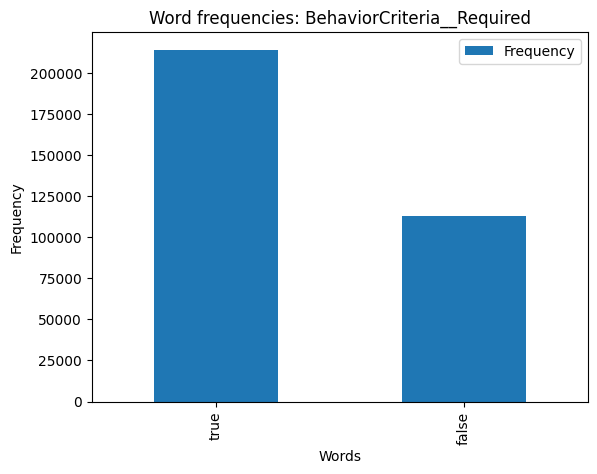

       Frequency
Word            
true      214116
false     113068



 None
Word-Frequency Plots for the column: BehaviorCriteria__Required_pp None

 ++++++++++++++++++++++++++++++ 



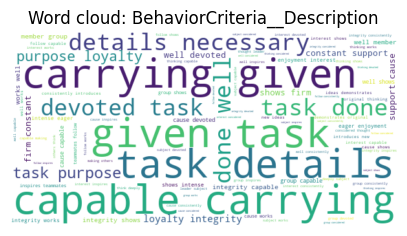

WordCloud for the column: BehaviorCriteria__Description_pp None


<Figure size 250x150 with 0 Axes>

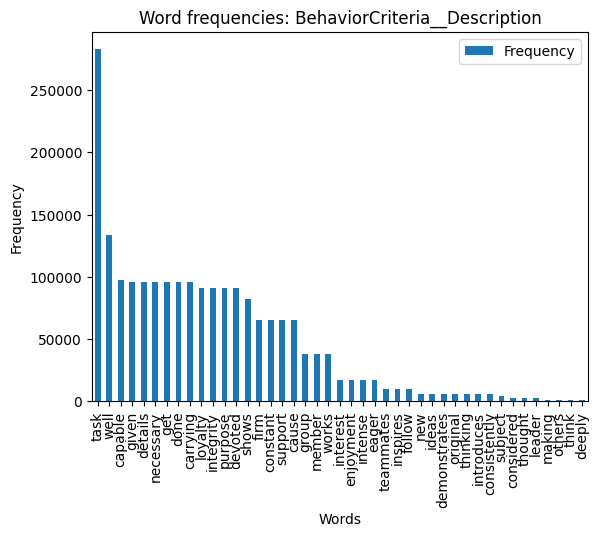

           Frequency
Word                
task          282688
well          133822
capable        97270
given          95967
details        95967
necessary      95967
get            95967
done           95967
carrying       95967
devoted        90754



 None
Word-Frequency Plots for the column: BehaviorCriteria__Description_pp None

 ++++++++++++++++++++++++++++++ 



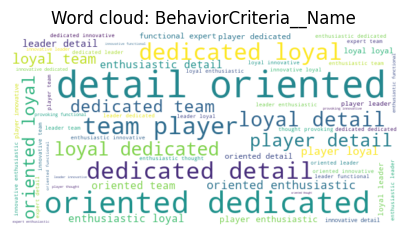

WordCloud for the column: BehaviorCriteria__Name_pp None


<Figure size 250x150 with 0 Axes>

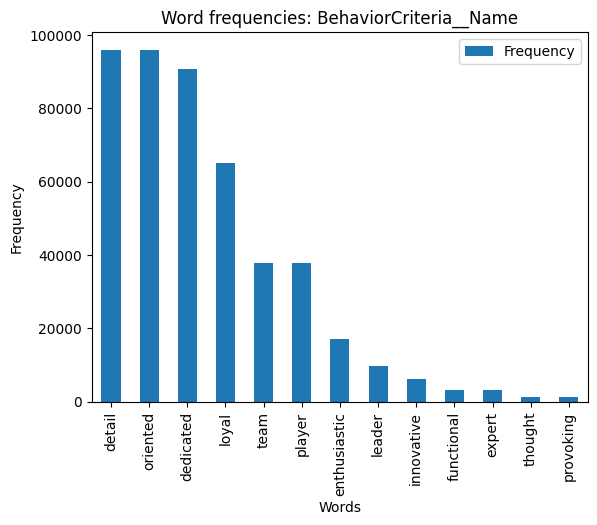

              Frequency
Word                   
detail            95967
oriented          95967
dedicated         90754
loyal             65209
team              37855
player            37855
enthusiastic      17165
leader             9668
innovative         6154
functional         3109



 None
Word-Frequency Plots for the column: BehaviorCriteria__Name_pp None

 ++++++++++++++++++++++++++++++ 



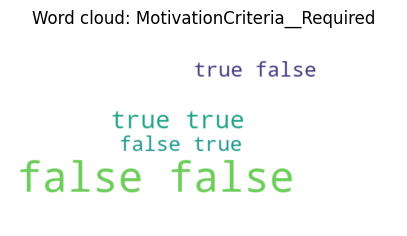

WordCloud for the column: MotivationCriteria__Required_pp None


<Figure size 250x150 with 0 Axes>

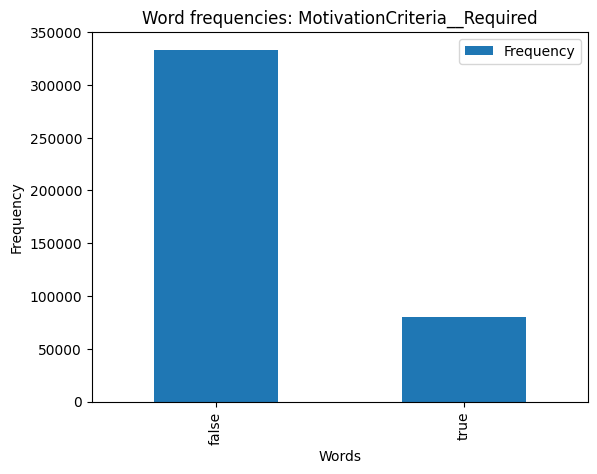

       Frequency
Word            
false     333452
true       79689



 None
Word-Frequency Plots for the column: MotivationCriteria__Required_pp None

 ++++++++++++++++++++++++++++++ 



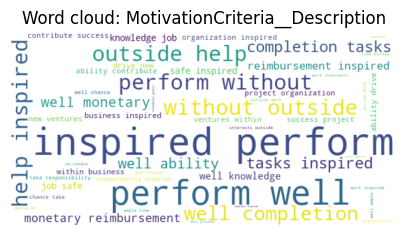

WordCloud for the column: MotivationCriteria__Description_pp None


<Figure size 250x150 with 0 Axes>

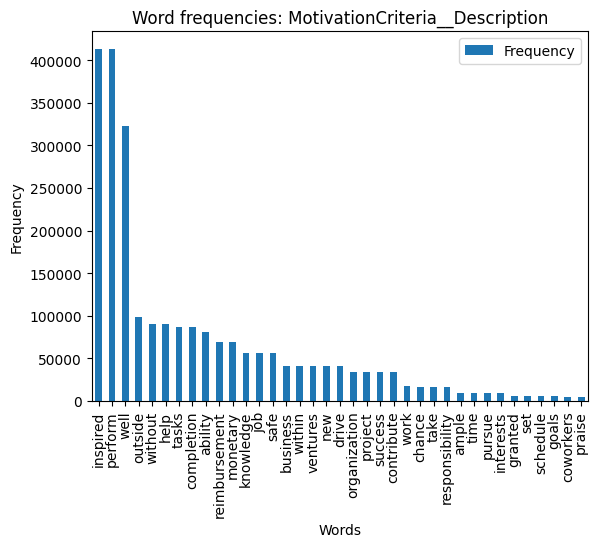

               Frequency
Word                    
inspired          413141
perform           413141
well              322789
outside            99286
without            90352
help               90352
tasks              86478
completion         86478
ability            80967
reimbursement      69438



 None
Word-Frequency Plots for the column: MotivationCriteria__Description_pp None

 ++++++++++++++++++++++++++++++ 



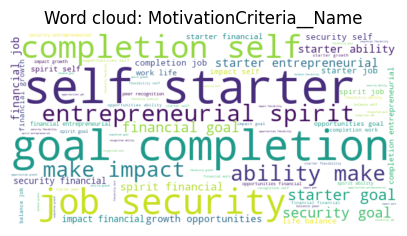

WordCloud for the column: MotivationCriteria__Name_pp None


<Figure size 250x150 with 0 Axes>

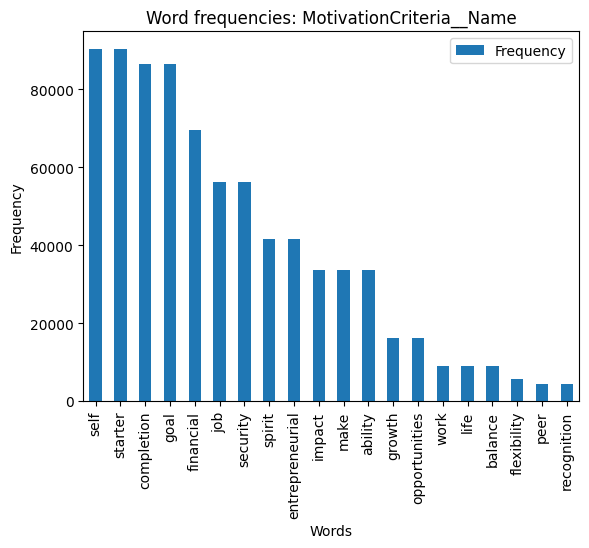

                 Frequency
Word                      
self                 90352
starter              90352
completion           86478
goal                 86478
financial            69438
job                  56326
security             56326
spirit               41665
entrepreneurial      41665
ability              33695



 None
Word-Frequency Plots for the column: MotivationCriteria__Name_pp None

 ++++++++++++++++++++++++++++++ 



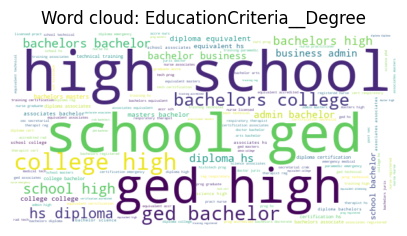

WordCloud for the column: EducationCriteria__Degree_pp None


<Figure size 250x150 with 0 Axes>

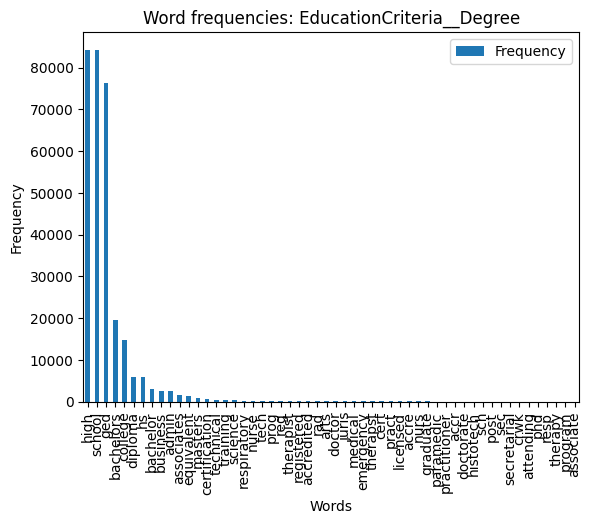

           Frequency
Word                
high           84319
school         84319
ged            76305
bachelors      19563
college        14806
diploma         5887
hs              5807
bachelor        2989
business        2539
admin           2539



 None
Word-Frequency Plots for the column: EducationCriteria__Degree_pp None

 ++++++++++++++++++++++++++++++ 



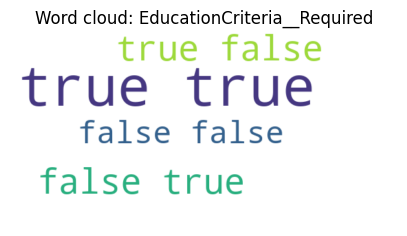

WordCloud for the column: EducationCriteria__Required_pp None


<Figure size 250x150 with 0 Axes>

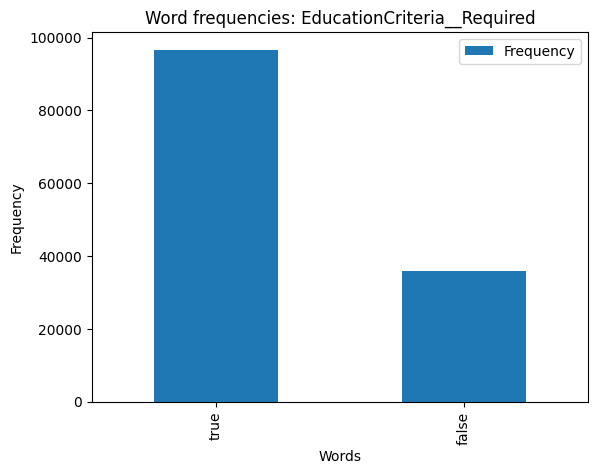

       Frequency
Word            
true       96719
false      35766



 None
Word-Frequency Plots for the column: EducationCriteria__Required_pp None

 ++++++++++++++++++++++++++++++ 



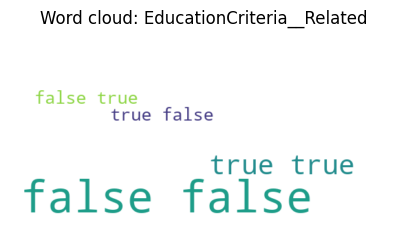

WordCloud for the column: EducationCriteria__Related_pp None


<Figure size 250x150 with 0 Axes>

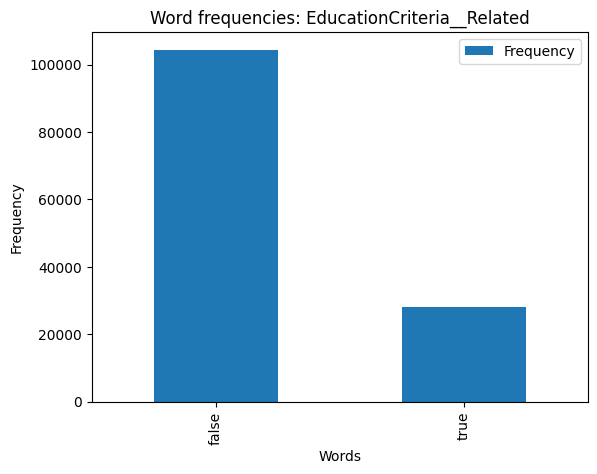

       Frequency
Word            
false     104457
true       28028



 None
Word-Frequency Plots for the column: EducationCriteria__Related_pp None

 ++++++++++++++++++++++++++++++ 



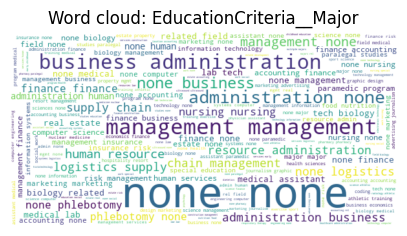

WordCloud for the column: EducationCriteria__Major_pp None


<Figure size 250x150 with 0 Axes>

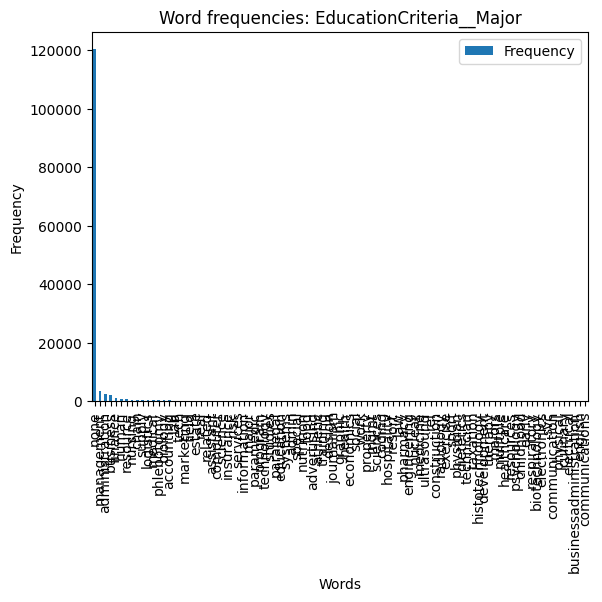

                Frequency
Word                     
none               120237
management           3599
administration       2583
business             2133
finance              1142
human                 811
resource              677
nursing               654
chain                 641
supply                641



 None
Word-Frequency Plots for the column: EducationCriteria__Major_pp None

 ++++++++++++++++++++++++++++++ 



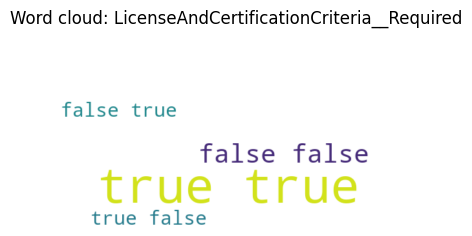

WordCloud for the column: LicenseAndCertificationCriteria__Required_pp None


<Figure size 250x150 with 0 Axes>

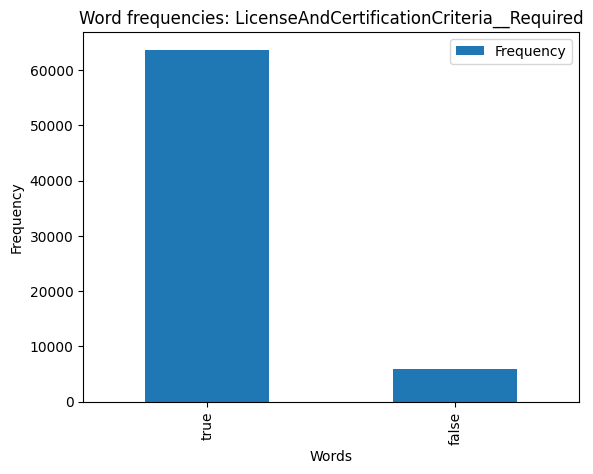

       Frequency
Word            
true       63697
false       5829



 None
Word-Frequency Plots for the column: LicenseAndCertificationCriteria__Required_pp None

 ++++++++++++++++++++++++++++++ 



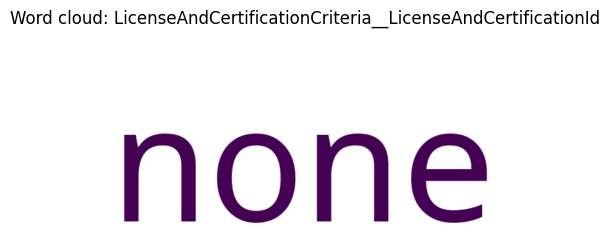

WordCloud for the column: LicenseAndCertificationCriteria__LicenseAndCertificationId_pp None


<Figure size 250x150 with 0 Axes>

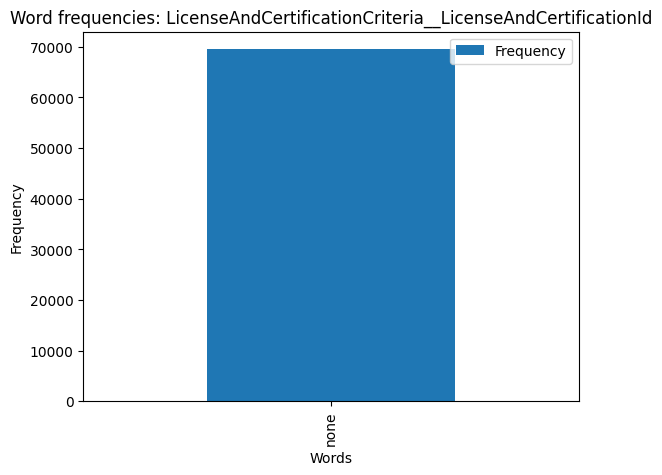

      Frequency
Word           
none      69526



 None
Word-Frequency Plots for the column: LicenseAndCertificationCriteria__LicenseAndCertificationId_pp None

 ++++++++++++++++++++++++++++++ 



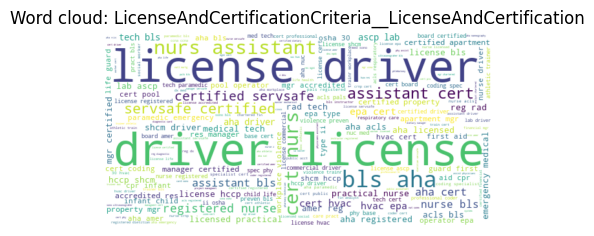

WordCloud for the column: LicenseAndCertificationCriteria__LicenseAndCertification_pp None


<Figure size 250x150 with 0 Axes>

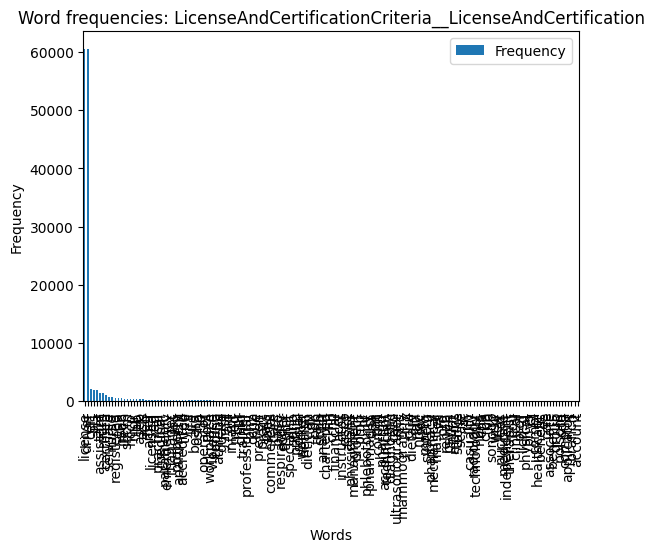

           Frequency
Word                
license        60488
driver         60477
cert            2155
bls             1889
aha             1867
assistant       1363
nurs            1344
certified       1103
servsafe         716
nurse            666



 None
Word-Frequency Plots for the column: LicenseAndCertificationCriteria__LicenseAndCertification_pp None

 ++++++++++++++++++++++++++++++ 



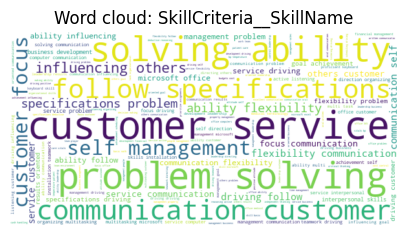

WordCloud for the column: SkillCriteria__SkillName_pp None


<Figure size 250x150 with 0 Axes>

               Frequency
Word                    
customer          106401
communication      91278
service            78449
problem            69280
solving            69280
ability            65371
driving            49829
management         39110
flexibility        37313
follow             35381



 None
Word-Frequency Plots for the column: SkillCriteria__SkillName_pp None

 ++++++++++++++++++++++++++++++ 



WordCloud for the column: SkillCriteria__MinimumScaleValue_pp None


<Figure size 250x150 with 0 Axes>

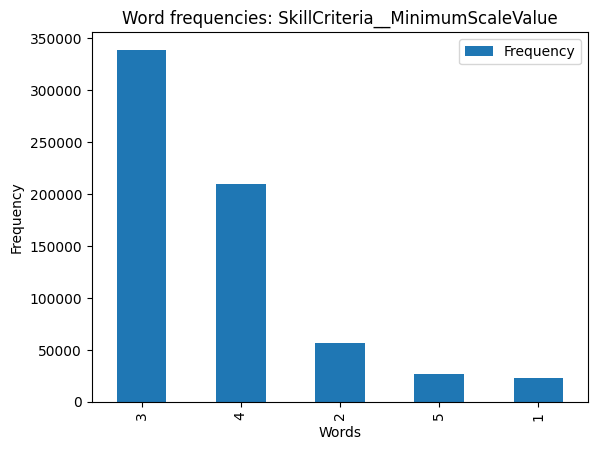

      Frequency
Word           
3        339047
4        209546
2         56543
5         26700
1         23058



 None
Word-Frequency Plots for the column: SkillCriteria__MinimumScaleValue_pp None

 ++++++++++++++++++++++++++++++ 



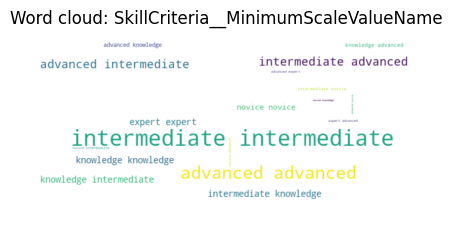

WordCloud for the column: SkillCriteria__MinimumScaleValueName_pp None


<Figure size 250x150 with 0 Axes>

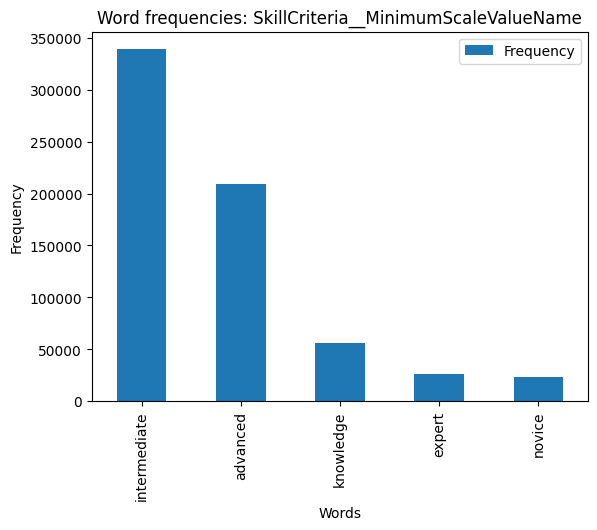

              Frequency
Word                   
intermediate     339047
advanced         209546
knowledge         56543
expert            26700
novice            23058



 None
Word-Frequency Plots for the column: SkillCriteria__MinimumScaleValueName_pp None

 ++++++++++++++++++++++++++++++ 



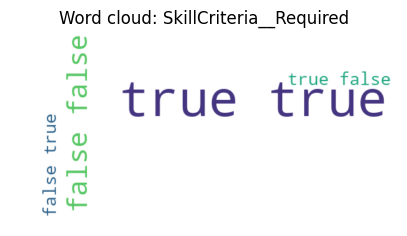

WordCloud for the column: SkillCriteria__Required_pp None


<Figure size 250x150 with 0 Axes>

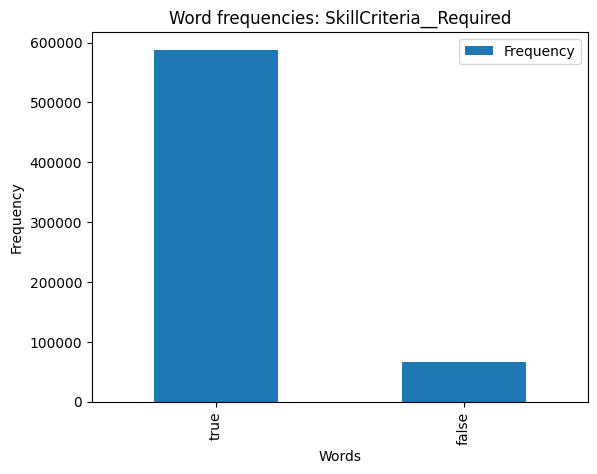

       Frequency
Word            
true      588263
false      66631



 None
Word-Frequency Plots for the column: SkillCriteria__Required_pp None

 ++++++++++++++++++++++++++++++ 



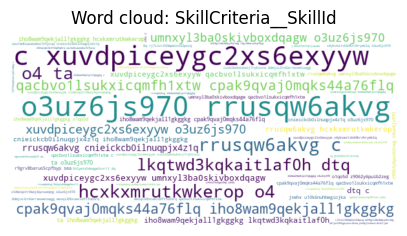

WordCloud for the column: SkillCriteria__SkillId_pp None


<Figure size 250x150 with 0 Axes>

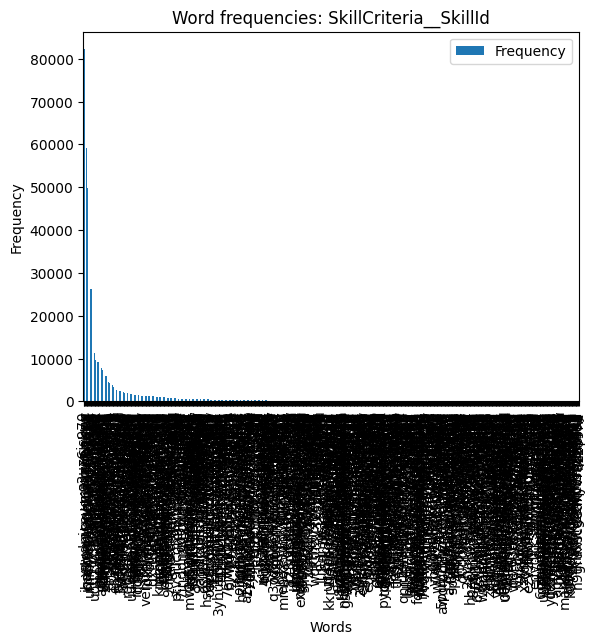

                        Frequency
Word                             
o3uz6js970                  82180
rrusqw6akvg                 82180
c                           74569
xuvdpiceygc2xs6exyyw        74569
iho8wam9qekjall1gkggkg      59137
qacbvo1lsukxicqmfh1xtw      49829
cpak9qvaj0mqks44a76flq      34869
cnieickcb0ilnuqpjx4z1q      27945
umnxyl3ba0skivboxdqagw      27662
hcxkxmrutkwkerop            26164



 None
Word-Frequency Plots for the column: SkillCriteria__SkillId_pp None

 ++++++++++++++++++++++++++++++ 



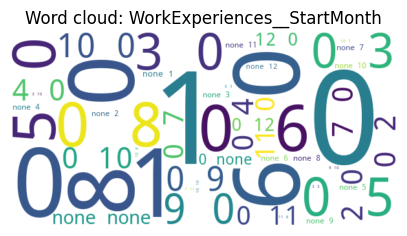

WordCloud for the column: WorkExperiences__StartMonth_pp None


<Figure size 250x150 with 0 Axes>

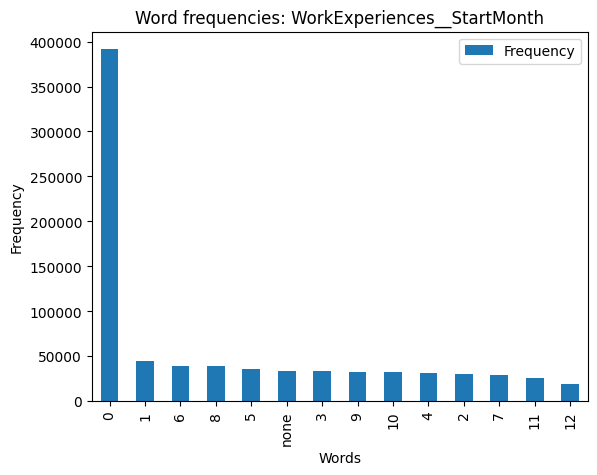

      Frequency
Word           
0        391512
1         44185
6         39605
8         38760
5         36267
none      33567
3         33558
9         32512
10        32023
4         30958



 None
Word-Frequency Plots for the column: WorkExperiences__StartMonth_pp None

 ++++++++++++++++++++++++++++++ 



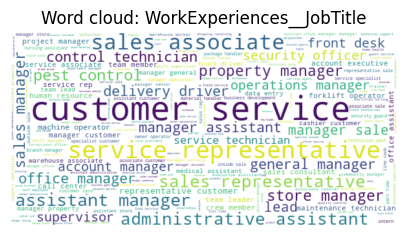

WordCloud for the column: WorkExperiences__JobTitle_pp None


<Figure size 250x150 with 0 Axes>

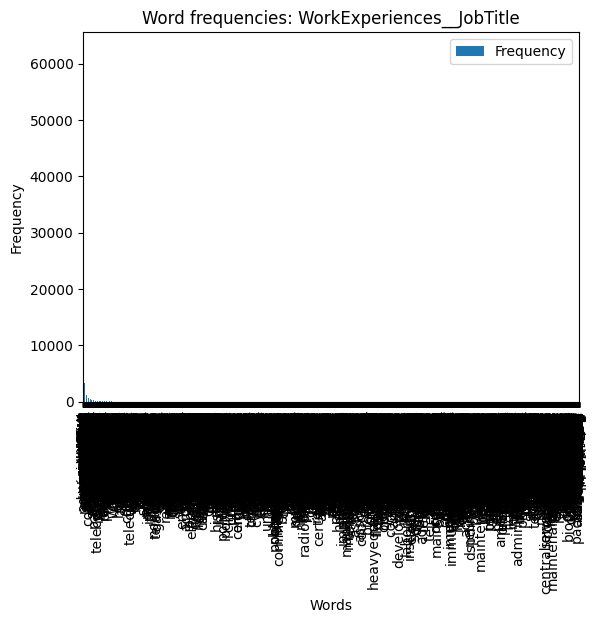

                Frequency
Word                     
manager             62462
service             33969
assistant           33619
sales               32748
customer            25333
technician          24314
representative      20188
associate           20016
specialist          17076
supervisor          13247



 None
Word-Frequency Plots for the column: WorkExperiences__JobTitle_pp None

 ++++++++++++++++++++++++++++++ 



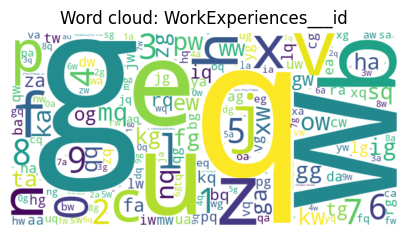

WordCloud for the column: WorkExperiences___id_pp None


<Figure size 250x150 with 0 Axes>

      Frequency
Word           
q          3967
w          3926
g          3901
e           911
k           861
u           813
b           659
f           658
z           657
v           654



 None
Word-Frequency Plots for the column: WorkExperiences___id_pp None

 ++++++++++++++++++++++++++++++ 



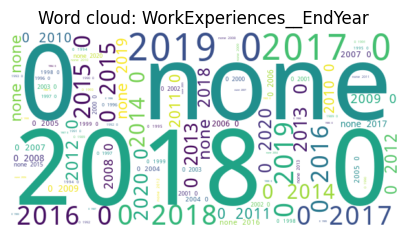

WordCloud for the column: WorkExperiences__EndYear_pp None


<Figure size 250x150 with 0 Axes>

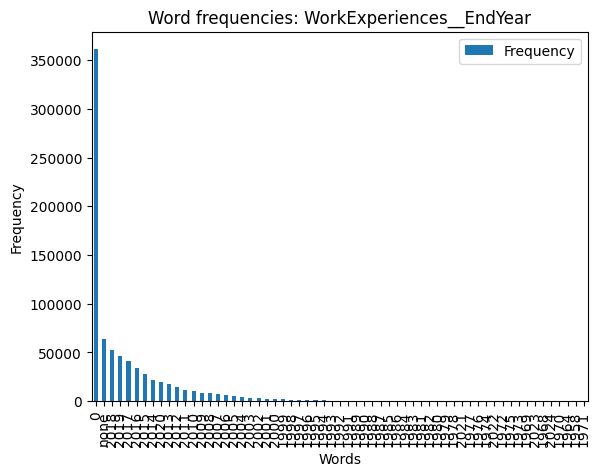

      Frequency
Word           
0        361125
none      63964
2018      52927
2019      46903
2017      41618
2016      34355
2015      27931
2014      22180
2020      19328
2013      17920



 None
Word-Frequency Plots for the column: WorkExperiences__EndYear_pp None

 ++++++++++++++++++++++++++++++ 



WordCloud for the column: WorkExperiences__StartYear_pp None


<Figure size 250x150 with 0 Axes>

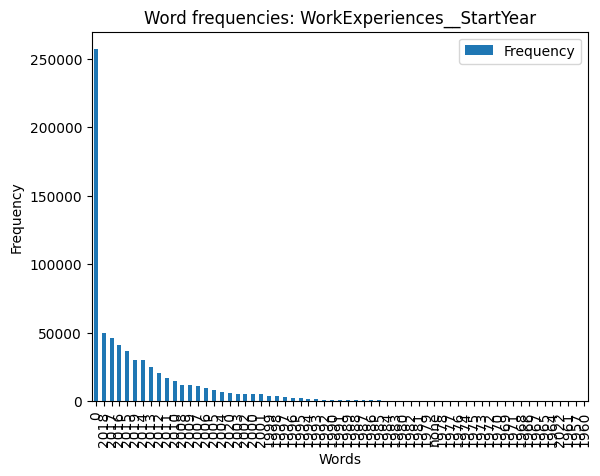

      Frequency
Word           
0        256823
2018      49812
2017      46300
2016      41114
2015      36634
2019      30437
2014      30197
2013      24888
2012      20577
2011      16878



 None
Word-Frequency Plots for the column: WorkExperiences__StartYear_pp None

 ++++++++++++++++++++++++++++++ 



WordCloud for the column: WorkExperiences__WhatYouDid_pp None


<Figure size 250x150 with 0 Axes>

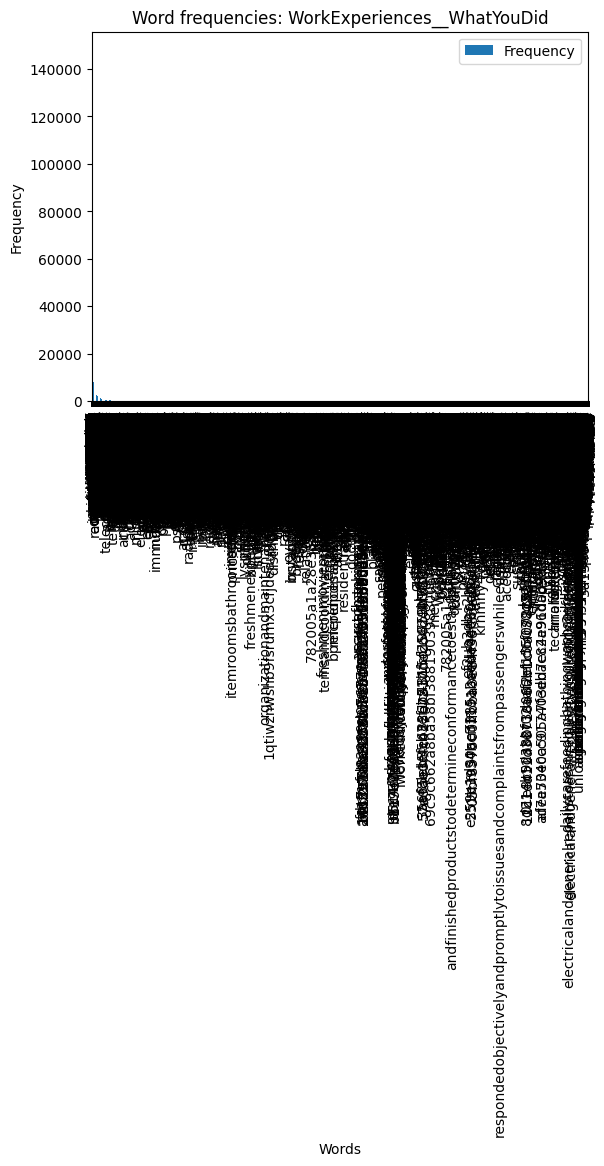

             Frequency
Word                  
customer        148313
service         110187
customers       107044
sales            96326
new              79430
work             73443
daily            60865
management       59360
responsible      57828
team             56137



 None
Word-Frequency Plots for the column: WorkExperiences__WhatYouDid_pp None

 ++++++++++++++++++++++++++++++ 



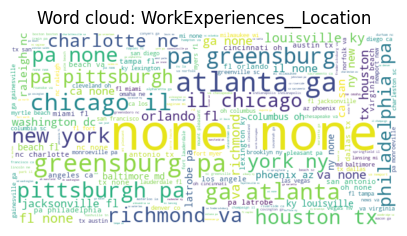

WordCloud for the column: WorkExperiences__Location_pp None


<Figure size 250x150 with 0 Axes>

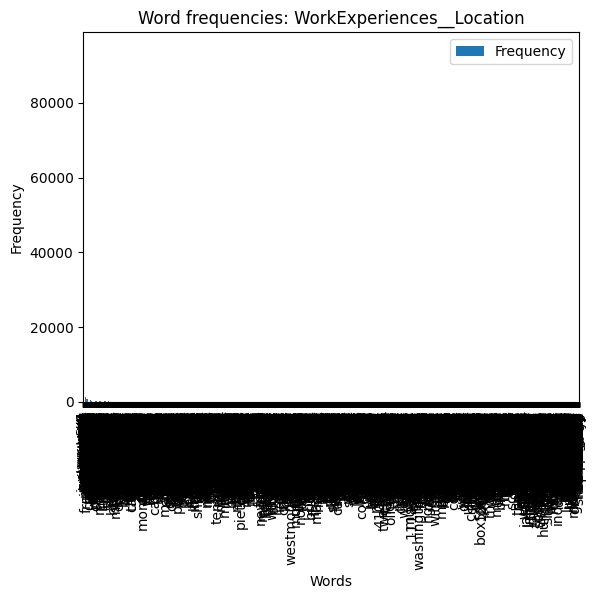

      Frequency
Word           
none      94159
pa        30344
fl        21294
ga        20325
va        19165
ca        18417
il        16948
ny        14792
tx        14006
nc        12524



 None
Word-Frequency Plots for the column: WorkExperiences__Location_pp None

 ++++++++++++++++++++++++++++++ 



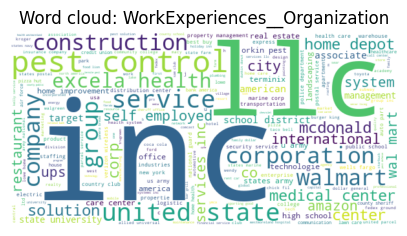

WordCloud for the column: WorkExperiences__Organization_pp None


<Figure size 250x150 with 0 Axes>

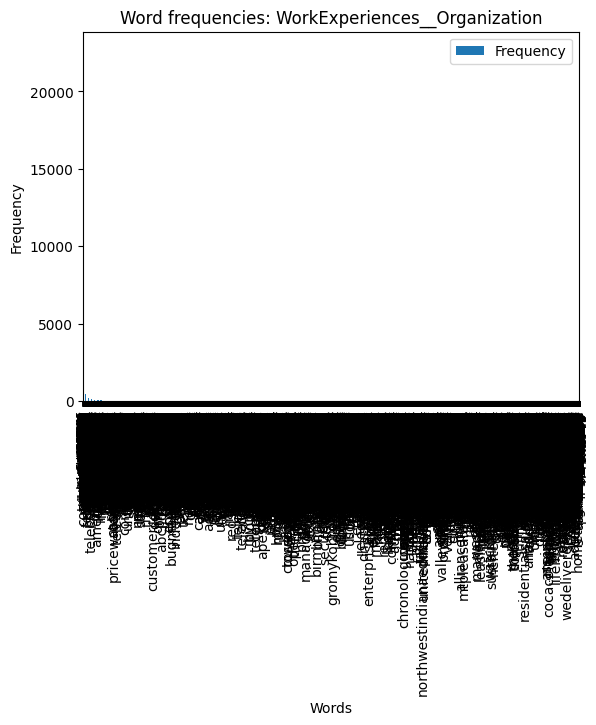

          Frequency
Word               
inc           22716
services      13024
center        10440
llc            8289
home           7521
company        7216
health         7187
pest           7044
group          6914
care           5483



 None
Word-Frequency Plots for the column: WorkExperiences__Organization_pp None

 ++++++++++++++++++++++++++++++ 



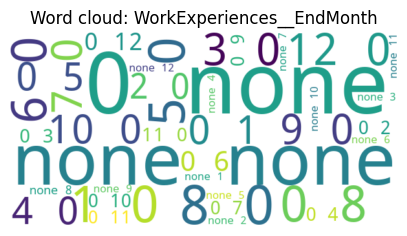

WordCloud for the column: WorkExperiences__EndMonth_pp None


<Figure size 250x150 with 0 Axes>

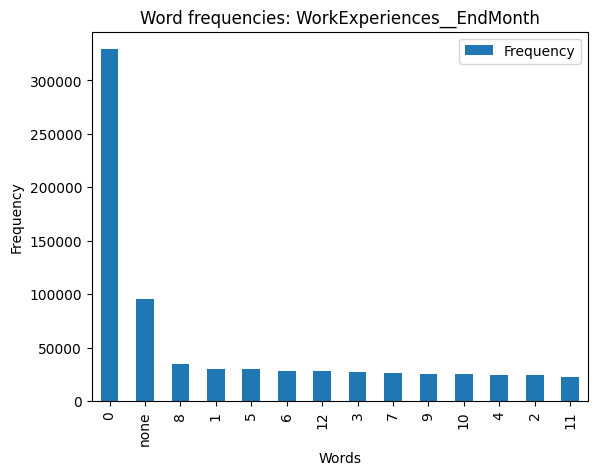

      Frequency
Word           
0        329063
none      96026
8         35114
1         30505
5         30159
6         28637
12        28137
3         27295
7         26051
9         25697



 None
Word-Frequency Plots for the column: WorkExperiences__EndMonth_pp None

 ++++++++++++++++++++++++++++++ 



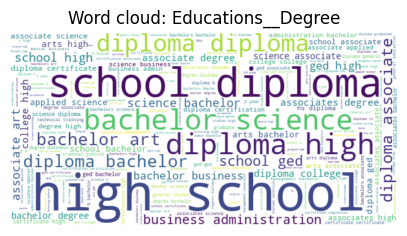

WordCloud for the column: Educations__Degree_pp None


<Figure size 250x150 with 0 Axes>

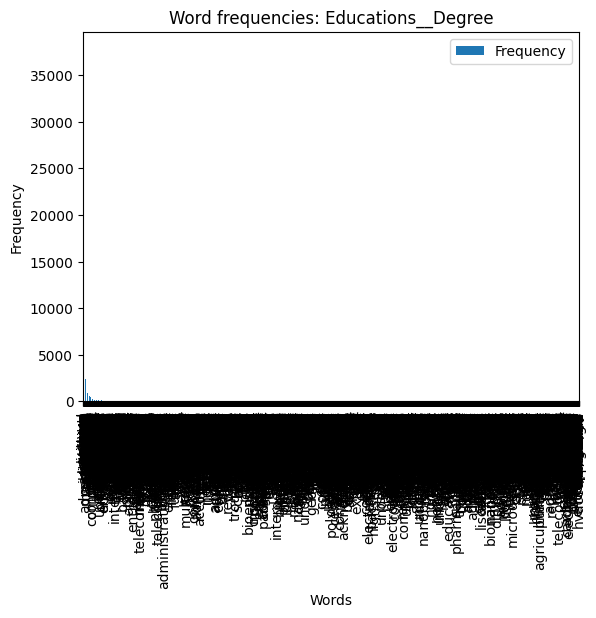

            Frequency
Word                 
diploma         37737
school          30556
high            30382
bachelor        18336
science         13855
associates       9819
arts             8747
associate        8077
ged              7637
degree           7095



 None
Word-Frequency Plots for the column: Educations__Degree_pp None

 ++++++++++++++++++++++++++++++ 



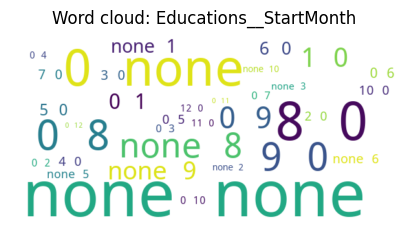

WordCloud for the column: Educations__StartMonth_pp None


<Figure size 250x150 with 0 Axes>

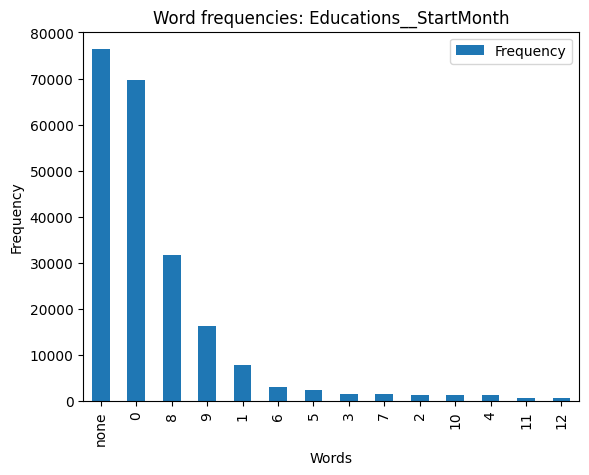

      Frequency
Word           
none      76364
0         69704
8         31621
9         16226
1          7803
6          3069
5          2398
3          1591
7          1536
2          1420



 None
Word-Frequency Plots for the column: Educations__StartMonth_pp None

 ++++++++++++++++++++++++++++++ 



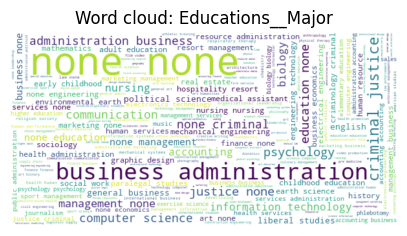

WordCloud for the column: Educations__Major_pp None


<Figure size 250x150 with 0 Axes>

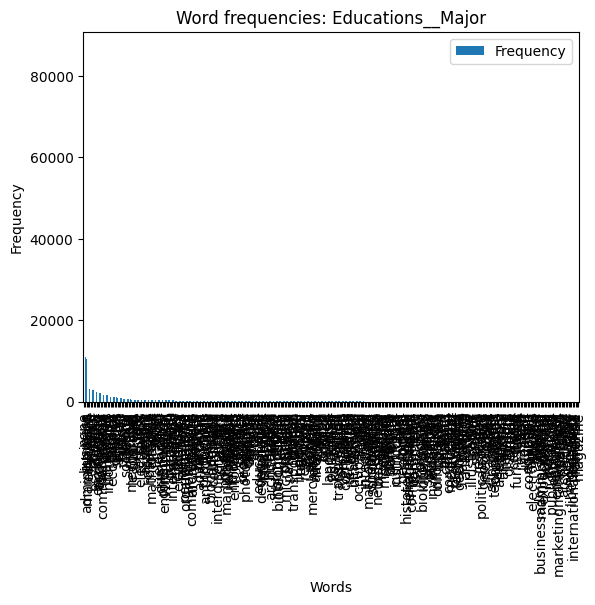

                Frequency
Word                     
none                86502
business            11056
administration      10526
management           3252
education            3213
science              2963
justice              2920
criminal             2920
psychology           2432
nursing              2254



 None
Word-Frequency Plots for the column: Educations__Major_pp None

 ++++++++++++++++++++++++++++++ 



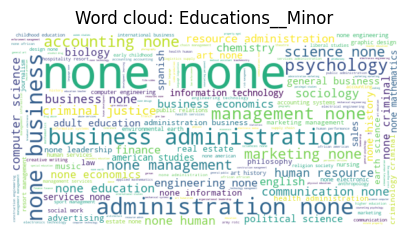

WordCloud for the column: Educations__Minor_pp None


<Figure size 250x150 with 0 Axes>

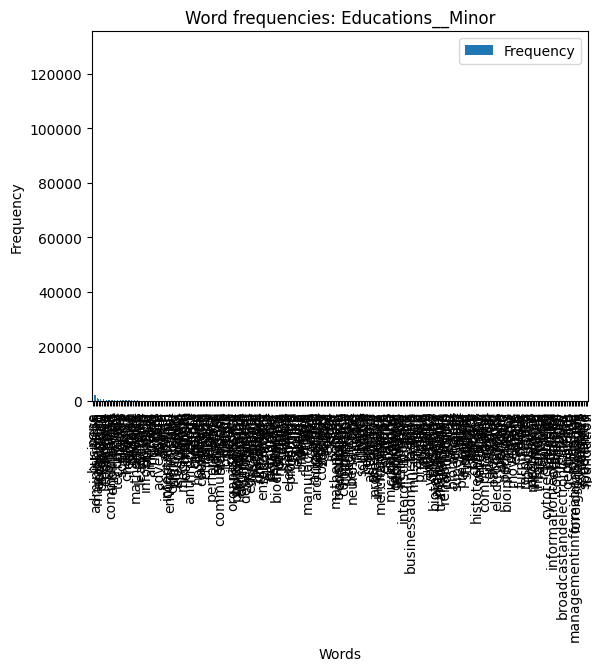

                Frequency
Word                     
none               129028
business             2156
administration       2082
management           1132
accounting            912
education             909
psychology            843
marketing             778
science               687
economics             568



 None
Word-Frequency Plots for the column: Educations__Minor_pp None

 ++++++++++++++++++++++++++++++ 



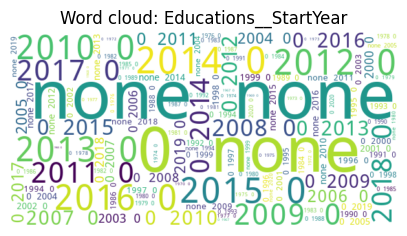

WordCloud for the column: Educations__StartYear_pp None


<Figure size 250x150 with 0 Axes>

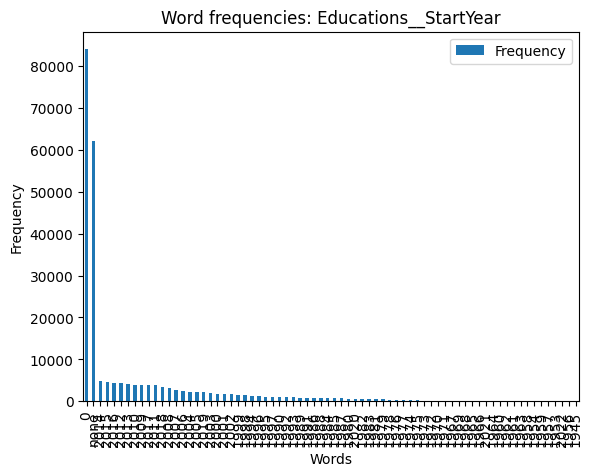

      Frequency
Word           
0         84050
none      62018
2014       4837
2015       4576
2016       4378
2012       4320
2013       4140
2010       3935
2009       3872
2017       3815



 None
Word-Frequency Plots for the column: Educations__StartYear_pp None

 ++++++++++++++++++++++++++++++ 



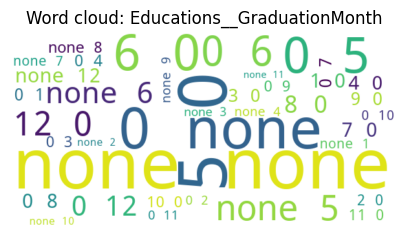

WordCloud for the column: Educations__GraduationMonth_pp None


<Figure size 250x150 with 0 Axes>

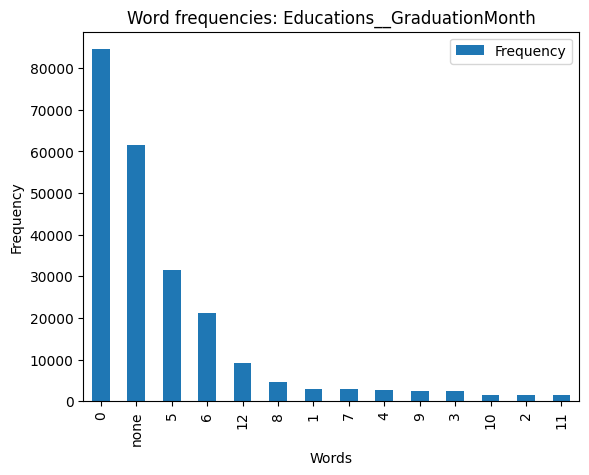

      Frequency
Word           
0         84513
none      61555
5         31431
6         21214
12         9277
8          4684
1          3015
7          2968
4          2750
9          2428



 None
Word-Frequency Plots for the column: Educations__GraduationMonth_pp None

 ++++++++++++++++++++++++++++++ 



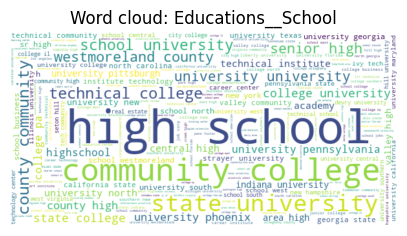

WordCloud for the column: Educations__School_pp None


<Figure size 250x150 with 0 Axes>

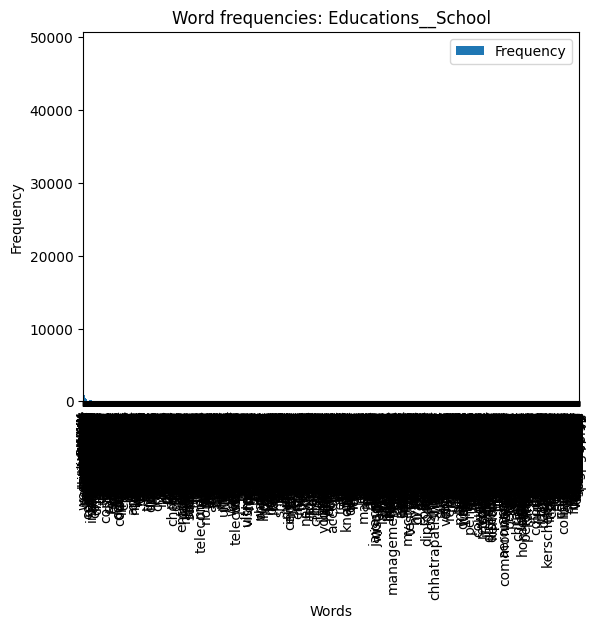

            Frequency
Word                 
school          48301
high            44621
university      37317
college         35873
community       16092
state           10083
county           6212
technical        5584
institute        4765
academy          3512



 None
Word-Frequency Plots for the column: Educations__School_pp None

 ++++++++++++++++++++++++++++++ 



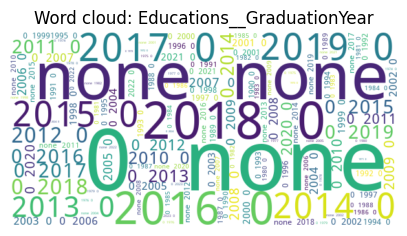

WordCloud for the column: Educations__GraduationYear_pp None


<Figure size 250x150 with 0 Axes>

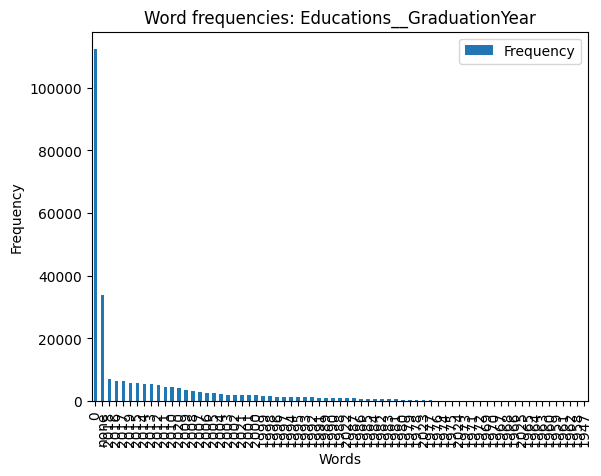

      Frequency
Word           
0        112223
none      33845
2018       6976
2016       6379
2017       6363
2019       5954
2015       5888
2014       5598
2013       5422
2012       5263



 None
Word-Frequency Plots for the column: Educations__GraduationYear_pp None

 ++++++++++++++++++++++++++++++ 



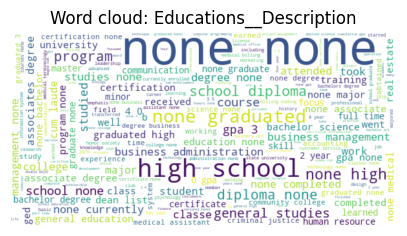

WordCloud for the column: Educations__Description_pp None


<Figure size 250x150 with 0 Axes>

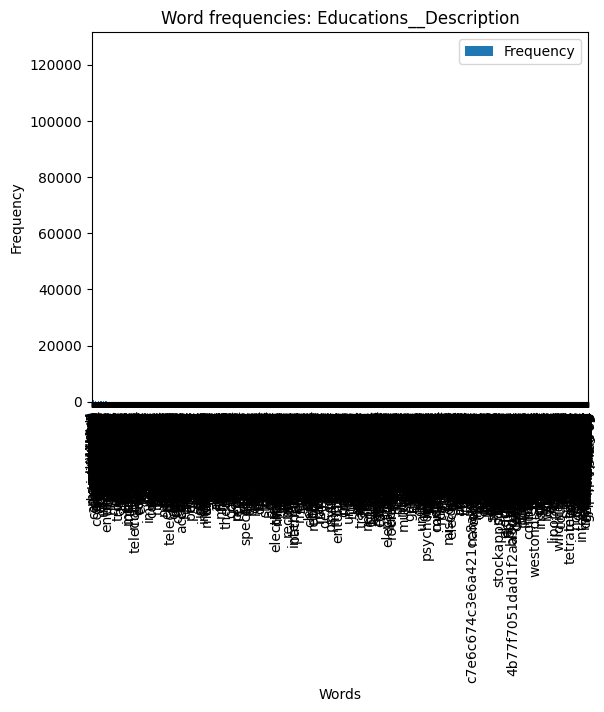

            Frequency
Word                 
none           125302
school           3433
degree           2460
high             2460
business         2098
graduated        2080
management       2002
college          1448
3                1379
studies          1300



 None
Word-Frequency Plots for the column: Educations__Description_pp None

 ++++++++++++++++++++++++++++++ 



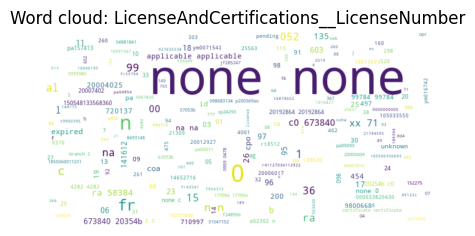

WordCloud for the column: LicenseAndCertifications__LicenseNumber_pp None


<Figure size 250x150 with 0 Axes>

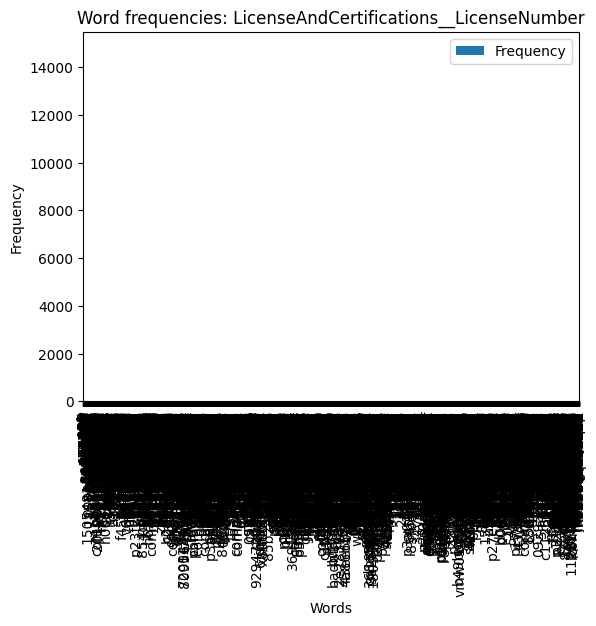

      Frequency
Word           
none      14743
0           224
n           203
fr           77
c            69
na           50
ra           46
99           36
052          36
1            35



 None
Word-Frequency Plots for the column: LicenseAndCertifications__LicenseNumber_pp None

 ++++++++++++++++++++++++++++++ 



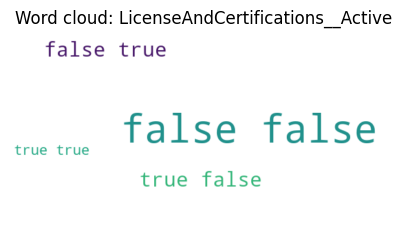

WordCloud for the column: LicenseAndCertifications__Active_pp None


<Figure size 250x150 with 0 Axes>

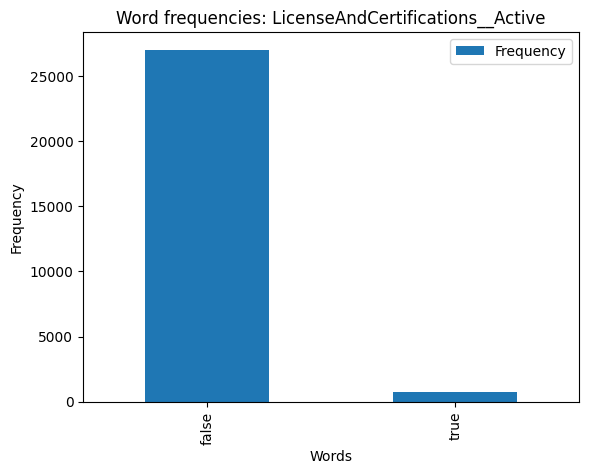

       Frequency
Word            
false      27042
true         703



 None
Word-Frequency Plots for the column: LicenseAndCertifications__Active_pp None

 ++++++++++++++++++++++++++++++ 



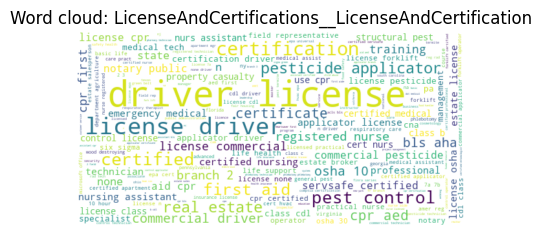

WordCloud for the column: LicenseAndCertifications__LicenseAndCertification_pp None


<Figure size 250x150 with 0 Axes>

               Frequency
Word                    
license             6113
driver              4109
certified           2452
cpr                 1458
certification       1114
applicator           987
pest                 939
commercial           820
pesticide            809
certificate          723



 None
Word-Frequency Plots for the column: LicenseAndCertifications__LicenseAndCertification_pp None

 ++++++++++++++++++++++++++++++ 



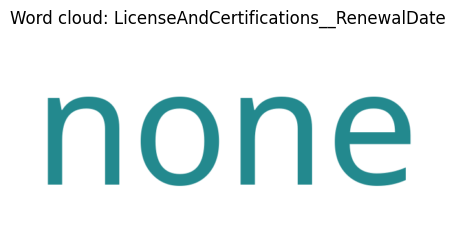

WordCloud for the column: LicenseAndCertifications__RenewalDate_pp None


<Figure size 250x150 with 0 Axes>

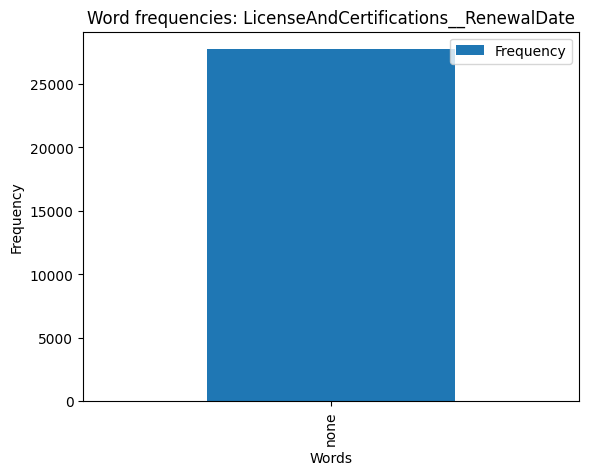

      Frequency
Word           
none      27745



 None
Word-Frequency Plots for the column: LicenseAndCertifications__RenewalDate_pp None

 ++++++++++++++++++++++++++++++ 



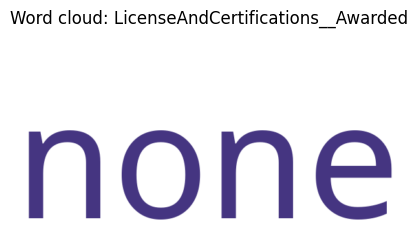

WordCloud for the column: LicenseAndCertifications__Awarded_pp None


<Figure size 250x150 with 0 Axes>

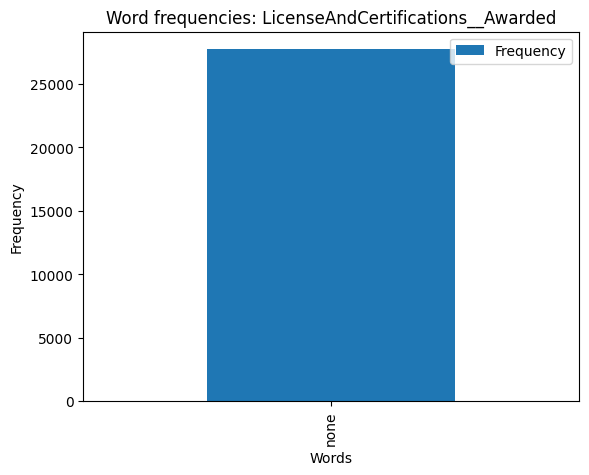

      Frequency
Word           
none      27745



 None
Word-Frequency Plots for the column: LicenseAndCertifications__Awarded_pp None

 ++++++++++++++++++++++++++++++ 



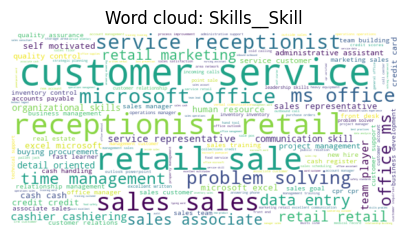

WordCloud for the column: Skills__Skill_pp None


<Figure size 250x150 with 0 Axes>

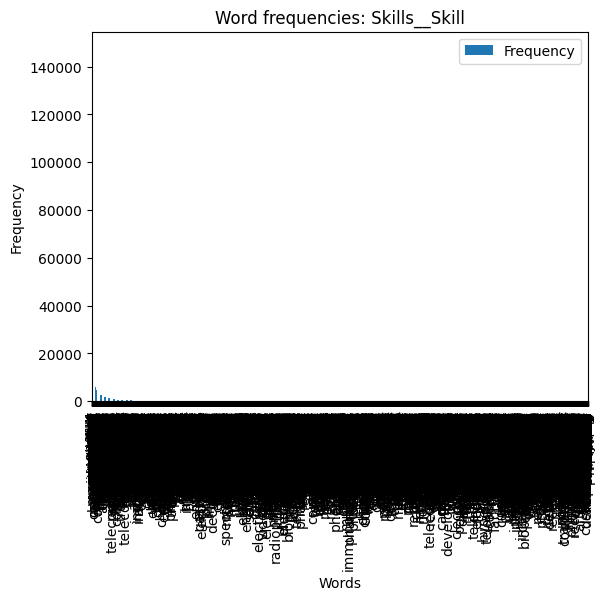

              Frequency
Word                   
sales            147243
customer          71934
service           61031
retail            57909
management        50926
office            46135
receptionist      41352
training          34328
inventory         28859
microsoft         28719



 None
Word-Frequency Plots for the column: Skills__Skill_pp None

 ++++++++++++++++++++++++++++++ 



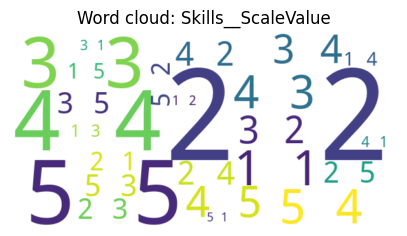

WordCloud for the column: Skills__ScaleValue_pp None


<Figure size 250x150 with 0 Axes>

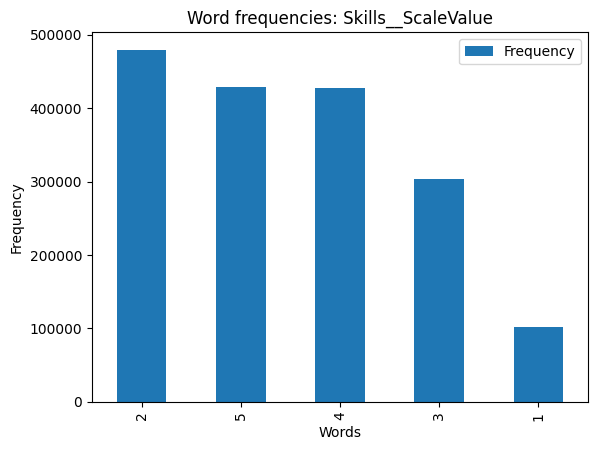

      Frequency
Word           
2        479509
5        428402
4        427758
3        304198
1        102332



 None
Word-Frequency Plots for the column: Skills__ScaleValue_pp None

 ++++++++++++++++++++++++++++++ 



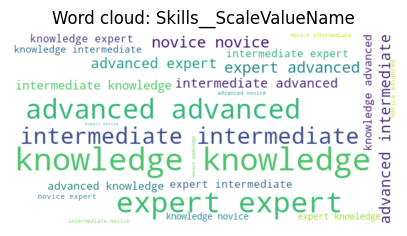

WordCloud for the column: Skills__ScaleValueName_pp None


<Figure size 250x150 with 0 Axes>

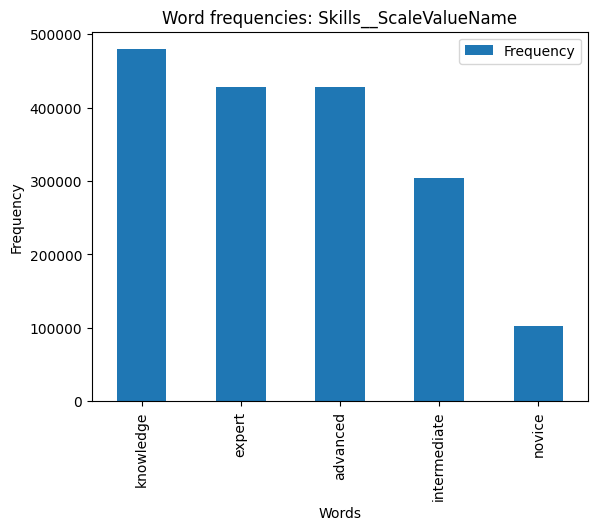

              Frequency
Word                   
knowledge        479509
expert           428402
advanced         427758
intermediate     304198
novice           102332



 None
Word-Frequency Plots for the column: Skills__ScaleValueName_pp None

 ++++++++++++++++++++++++++++++ 



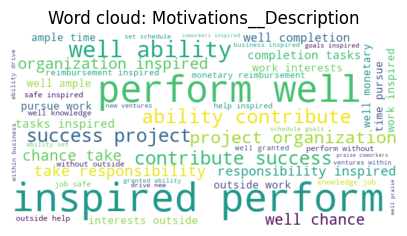

WordCloud for the column: Motivations__Description_pp None


<Figure size 250x150 with 0 Axes>

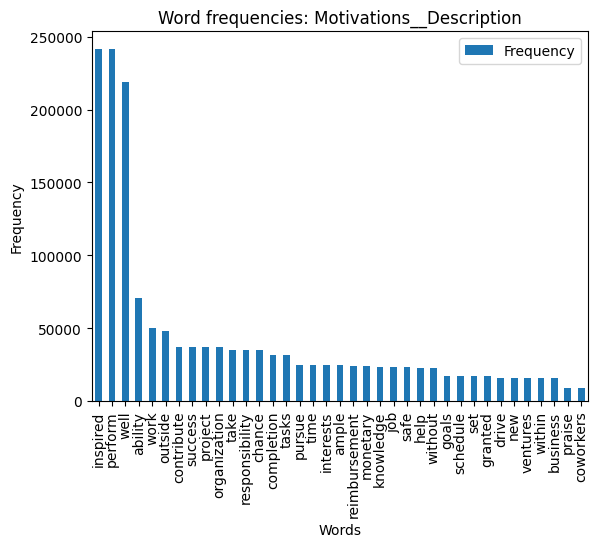

              Frequency
Word                   
inspired         241492
perform          241492
well             218580
ability           70557
work              50084
outside           47954
contribute        37132
success           37132
project           37132
organization      37132



 None
Word-Frequency Plots for the column: Motivations__Description_pp None

 ++++++++++++++++++++++++++++++ 



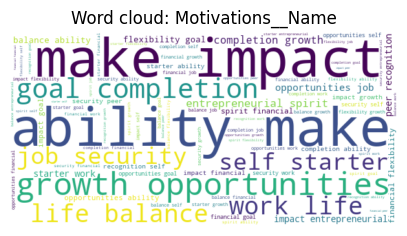

WordCloud for the column: Motivations__Name_pp None


<Figure size 250x150 with 0 Axes>

               Frequency
Word                    
ability            37132
make               37132
impact             37132
growth             35086
opportunities      35086
goal               31380
completion         31380
work               25042
balance            25042
life               25042



 None
Word-Frequency Plots for the column: Motivations__Name_pp None

 ++++++++++++++++++++++++++++++ 



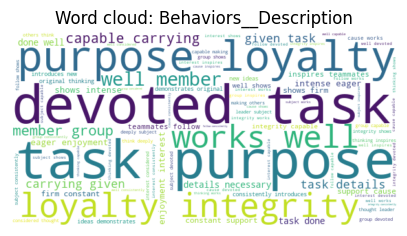

WordCloud for the column: Behaviors__Description_pp None


<Figure size 250x150 with 0 Axes>

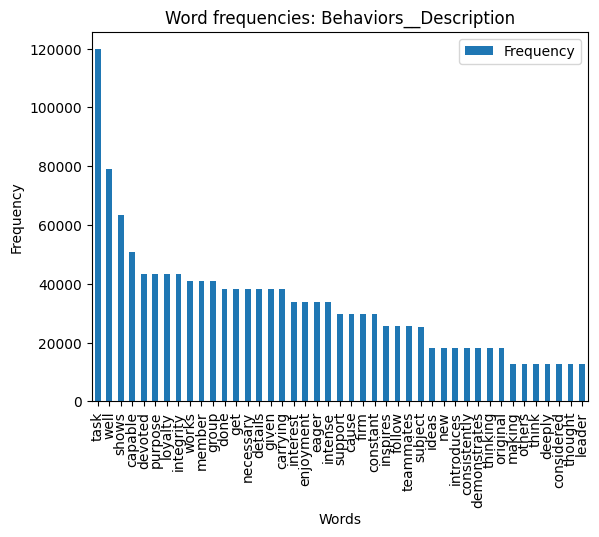

           Frequency
Word                
task          119733
well           79232
shows          63523
capable        50933
devoted        43423
purpose        43423
loyalty        43423
integrity      43423
works          41077
member         41077



 None
Word-Frequency Plots for the column: Behaviors__Description_pp None

 ++++++++++++++++++++++++++++++ 



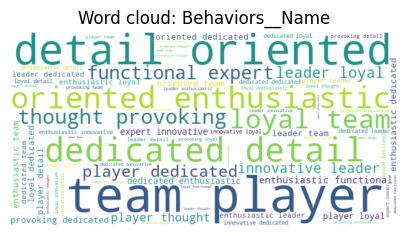

WordCloud for the column: Behaviors__Name_pp None


<Figure size 250x150 with 0 Axes>

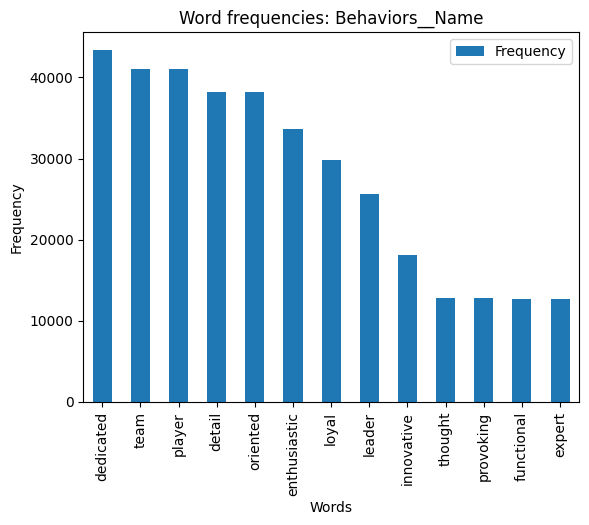

              Frequency
Word                   
dedicated         43423
team              41077
player            41077
detail            38155
oriented          38155
enthusiastic      33683
loyal             29840
leader            25660
innovative        18044
thought           12778



 None
Word-Frequency Plots for the column: Behaviors__Name_pp None

 ++++++++++++++++++++++++++++++ 



In [40]:
# Printing wordclouds and word frequency plots for each pre-processed columns

for columns in pp_colnames:
    print(
        "WordCloud for the column: {}".format(columns),
        wordcloud(rdata, columns),
    )
    print(
        "Word-Frequency Plots for the column: {}".format(columns),
        wordfreqplot(rdata, columns),
    )
    print("\n", "+" * 30, "\n")

Let's check the max and min length of text in each of the columns to determine how the texts would be processed in large language models. 

In [41]:
for columns in pp_colnames:
    if (
        rdata[columns].apply(len).max() > 512
        or rdata[columns].apply(len).min() > 512
    ):
        print(
            columns + " max_len :",
            rdata[columns].apply(len).max(),
            "\n",
            columns + " min_len :",
            rdata[columns].apply(len).min(),
            "\n",
            "+" * 20,
            "\n",
        )

WorkExperiences__JobTitle_pp max_len : 1339 
 WorkExperiences__JobTitle_pp min_len : 0 
 ++++++++++++++++++++ 

WorkExperiences___id_pp max_len : 661 
 WorkExperiences___id_pp min_len : 16 
 ++++++++++++++++++++ 

WorkExperiences__WhatYouDid_pp max_len : 25383 
 WorkExperiences__WhatYouDid_pp min_len : 0 
 ++++++++++++++++++++ 

WorkExperiences__Organization_pp max_len : 943 
 WorkExperiences__Organization_pp min_len : 0 
 ++++++++++++++++++++ 

Educations__Description_pp max_len : 2896 
 Educations__Description_pp min_len : 0 
 ++++++++++++++++++++ 

LicenseAndCertifications__LicenseAndCertification_pp max_len : 2290 
 LicenseAndCertifications__LicenseAndCertification_pp min_len : 0 
 ++++++++++++++++++++ 

Skills__Skill_pp max_len : 3840 
 Skills__Skill_pp min_len : 0 
 ++++++++++++++++++++ 

Skills__ScaleValue_pp max_len : 565 
 Skills__ScaleValue_pp min_len : 0 
 ++++++++++++++++++++ 

Skills__ScaleValueName_pp max_len : 2798 
 Skills__ScaleValueName_pp min_len : 0 
 ++++++++++++++

#### 1.2.2.5 Conducting the data preprocessing, wordcloud and word freq distribution operations for text heavy - ExternalDescription and ExternalBriefDescription
It has been observed that the columns ExternalDescription and ExternalBriefDescription contain substantial text, necessitating word count analysis. Consequently, we will conduct preprocessing and evaluate word frequency to identify highly recurring words.

For each column, we will generate both a word frequency plot, illustrating the most frequent words by size, and a word frequency graph, indicating the occurrences of specific words. Additionally, we will provide frequency counts for the top ten most occurring words.

/var/folders/_0/gwtrw0ms65zdzng2095bbrdr0000gn/T/ipykernel_99754/2682560620.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rdata[colnames + "__pp"] = rdata[colnames].apply(lambda x: [x])
/var/folders/_0/gwtrw0ms65zdzng2095bbrdr0000gn/T/ipykernel_99754/2682560620.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rdata[colnames + "__pp"] = rdata[colnames].apply(lambda x: [x])


WordCloud for the column: ExternalDescription__pp


Word-Frequency Plots for the column: ExternalDescription__pp


<Figure size 250x150 with 0 Axes>

            Frequency
Word                 
nbsp          1506134
service        574923
pest           430862
customer       418493
orkin          342539
management     341096
work           316425
customers      315646
training       307619
company        306578



 None

 ++++++++++++++++++++++++++++++ 

WordCloud for the column: ExternalBriefDescription__pp


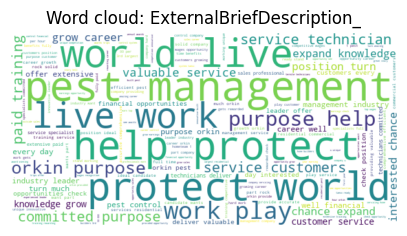

Word-Frequency Plots for the column: ExternalBriefDescription__pp


<Figure size 250x150 with 0 Axes>

             Frequency
Word                  
service         153902
orkin           120377
purpose         116352
pest            100832
career           98781
work             82294
management       75482
customers        68977
position         66454
technicians      64415



 None

 ++++++++++++++++++++++++++++++ 



In [42]:
# Applying preprocessing step to the two columns

for colnames in ["ExternalDescription", "ExternalBriefDescription"]:
    rdata[colnames + "__pp"] = rdata[colnames].apply(lambda x: [x])
    rdata[colnames + "__pp"] = rdata[colnames + "__pp"].apply(preprocessing)


# Applying wordcloud and wordfreq plot

for x in ["ExternalDescription__pp", "ExternalBriefDescription__pp"]:
    print("WordCloud for the column: {}".format(x))
    wordcloud(rdata, x)
    print("Word-Frequency Plots for the column: {}".format(x))
    wordfreqplot(rdata, x)
    print("\n", "+" * 30, "\n")

Thus we have created wordfrequency and word cloud plots for the columns : ExternalDescription and ExternalBriefDescription